# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [1]:
# ![alt](home_credit.png "Home credit")

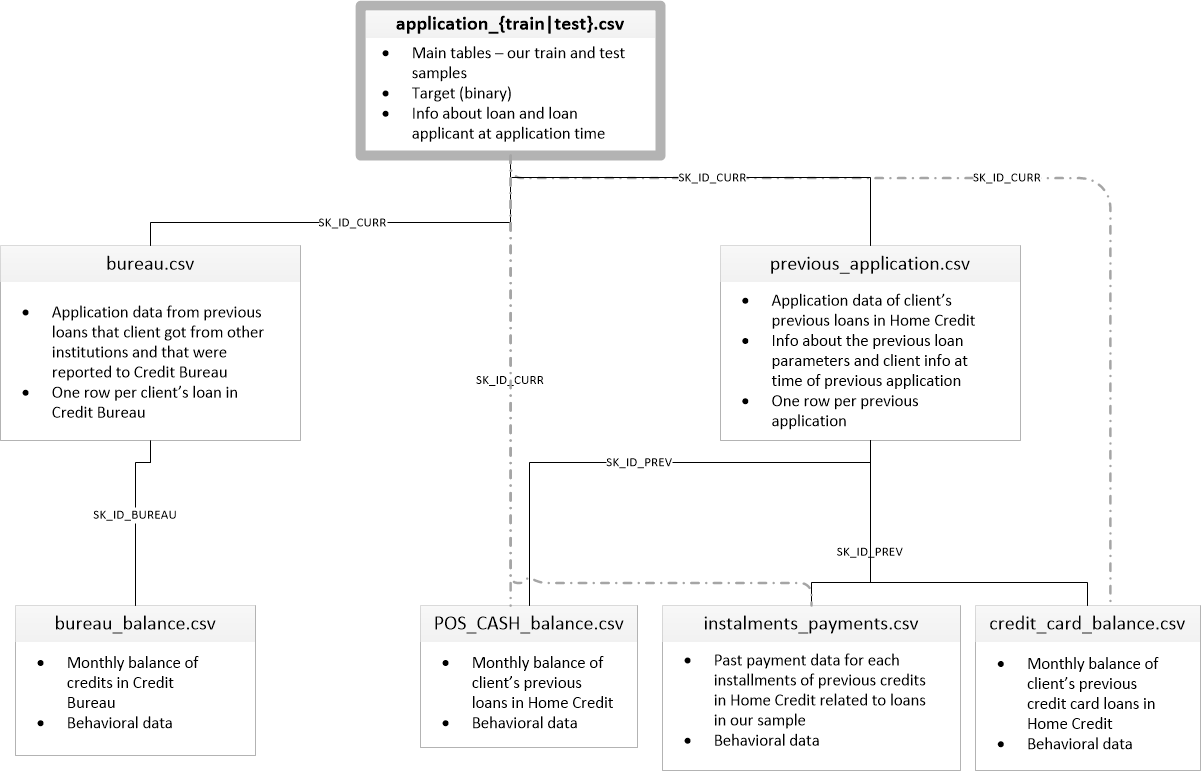

## Downloading the files to local

Create a base directory:

```bash
DATA_DIR = "../Data/"  
```


### Imports

In [2]:
# import packages

import os
import time
import warnings
import zipfile
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
import missingno as msno
#pip install msno

warnings.filterwarnings('ignore')


In [3]:
!pwd

/root/shared/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission


### Loadig Data

Creating dictionary for datasets so that we can keep track of datsets and also make them callable to functions.

In [4]:
# load data

DATA_DIR =  "/../Data/"

ds_names = ("application_train", "application_test", "bureau", "bureau_balance",
            "credit_card_balance", "installments_payments","previous_application",
            "POS_CASH_balance","credit_card_balance")

datasets = {}

for ds_name in ds_names:
    datasets[ds_name] = pd.read_csv(os.getcwd() + DATA_DIR + f'{ds_name}.csv')

In case reading zip files, we can use below code to unzip files are read them.

In [5]:
unzippingReq = False
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile('application_train.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('application_test.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('credit_card_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('installments_payments.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('POS_CASH_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('previous_application.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

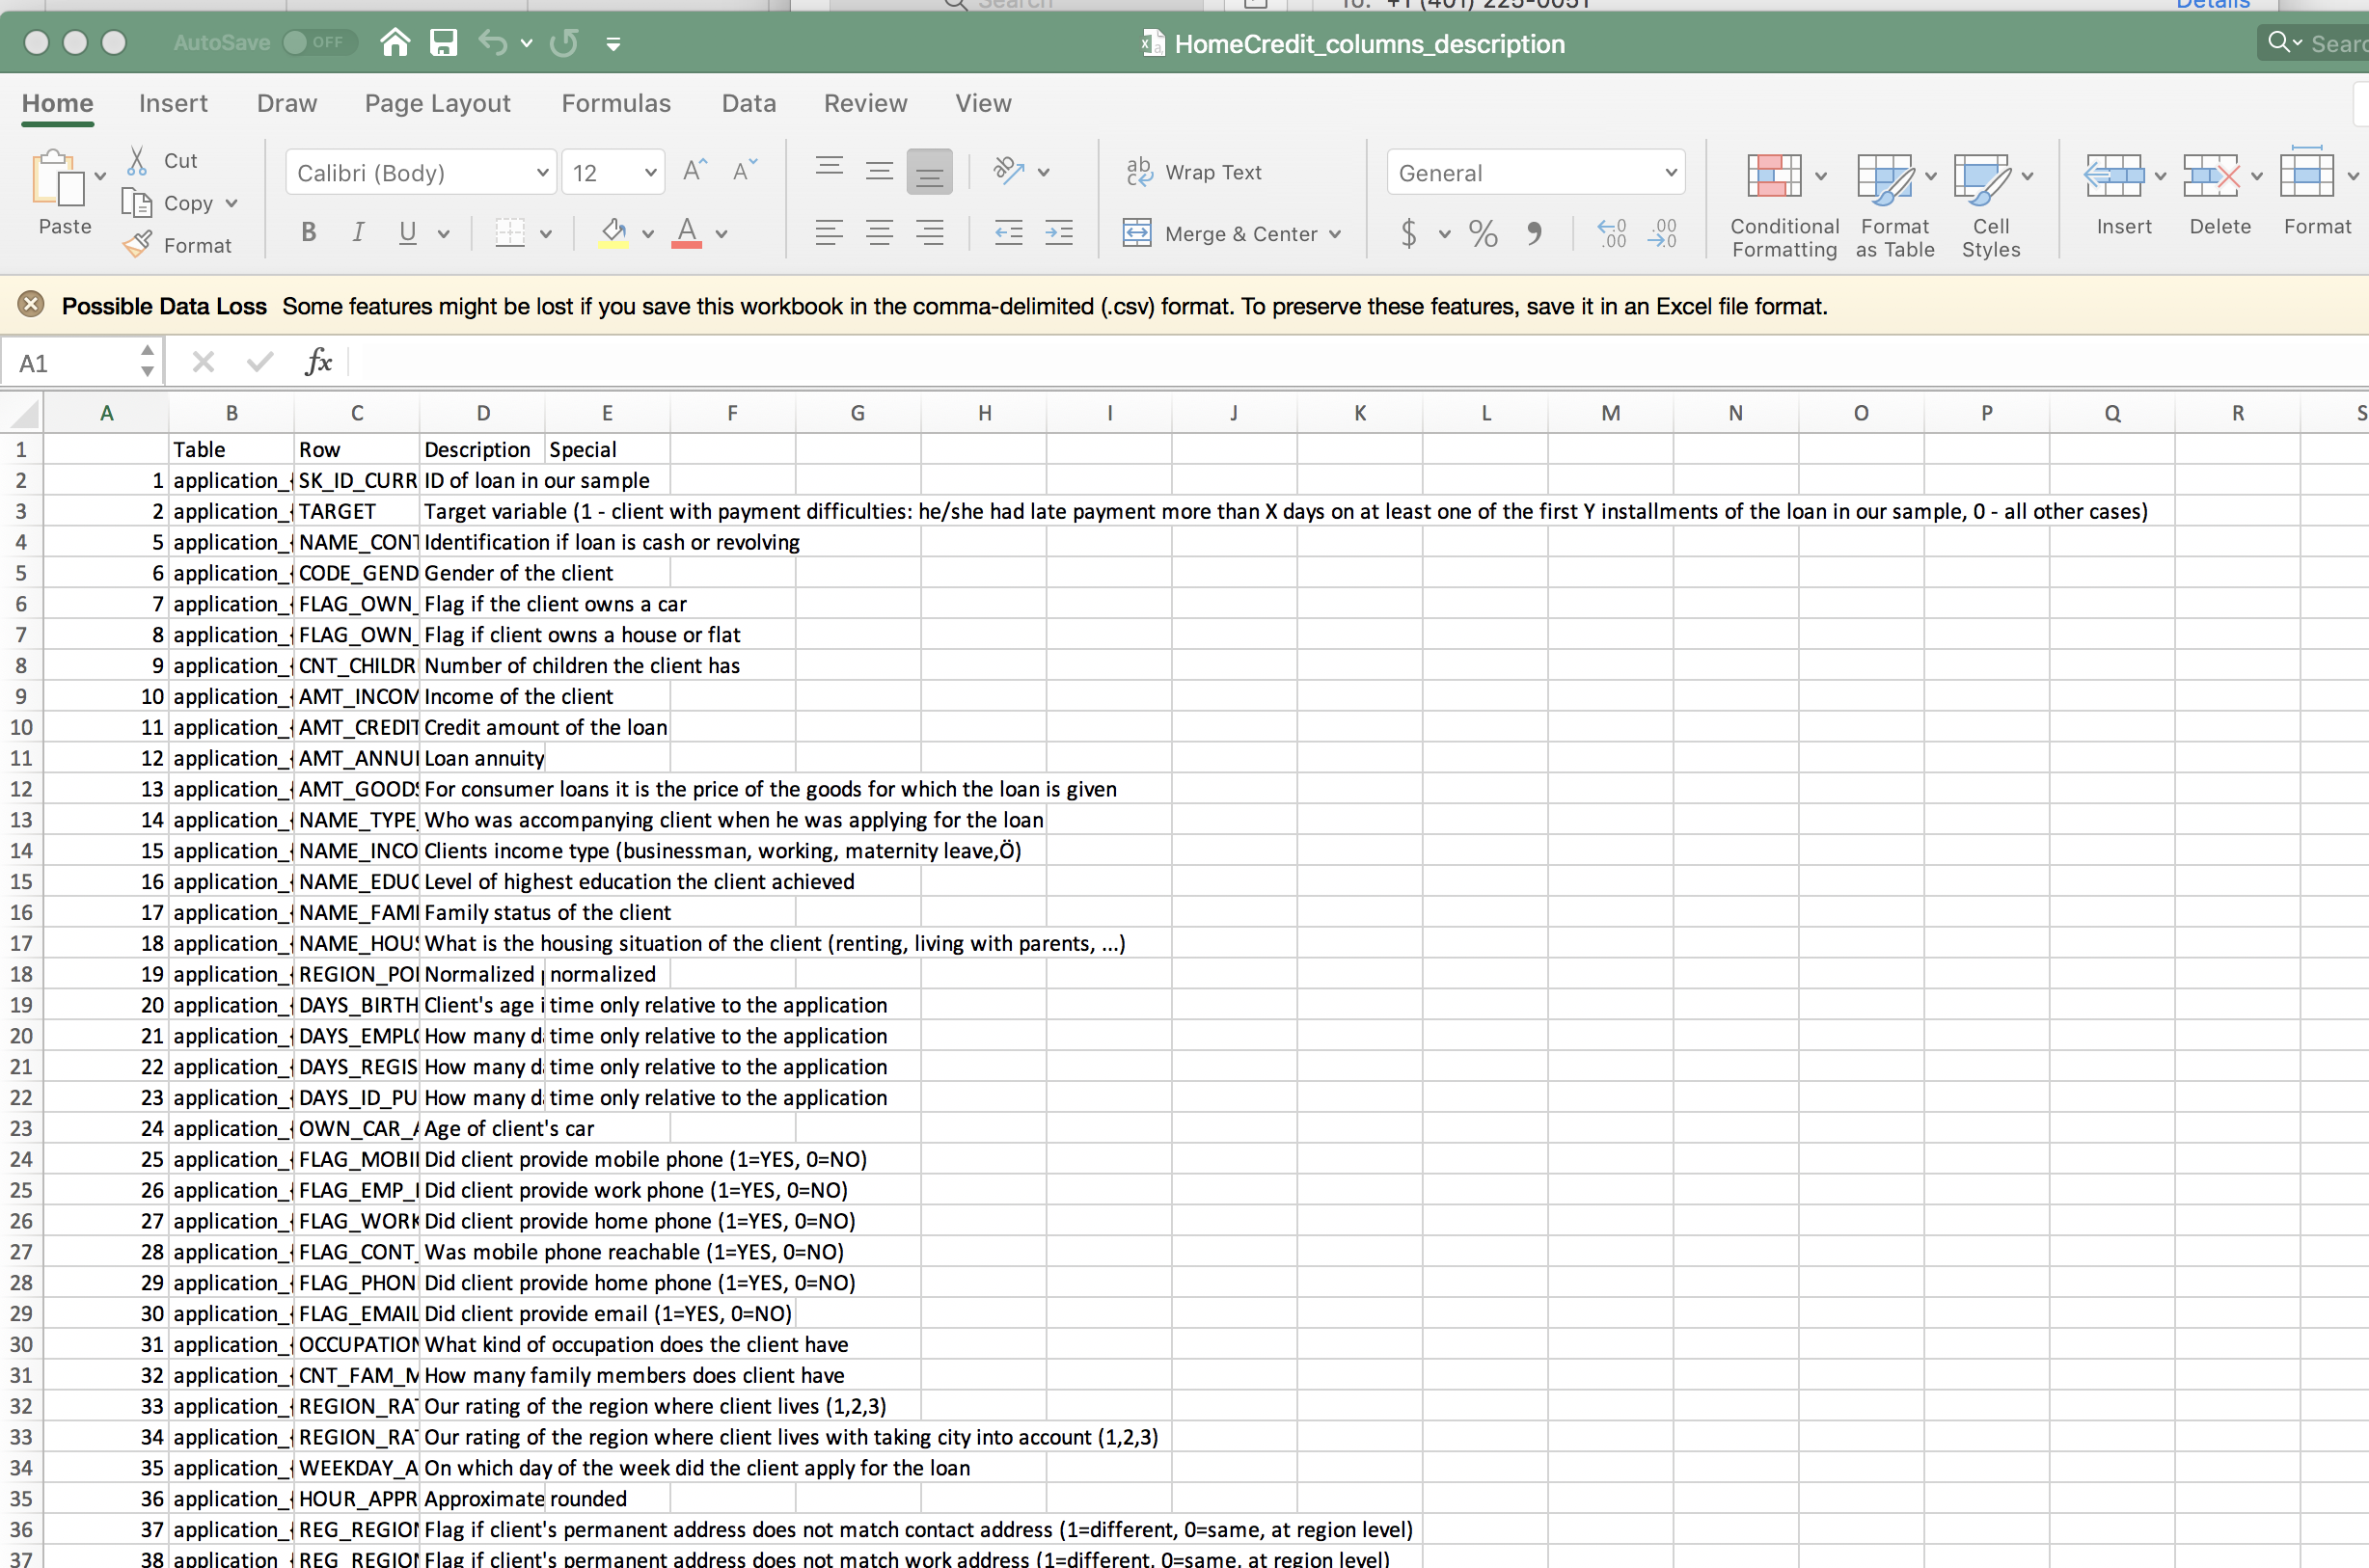

### Application train

In [6]:


def load_data(df,name):
    #df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

ds_name = 'application_train'
datasets[ds_name]= load_data(datasets[ds_name],ds_name)

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [7]:
ds_name = 'application_test'
datasets[ds_name]= load_data(datasets[ds_name],ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* __Credit_card_balance:__ monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [8]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(datasets[ds_name], ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

CPU times: user 4.09 s, sys: 163 ms, total: 4.25 s
Wall time: 4.19 s


In [9]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis

## EDA Functions

### Summary Function - All tables

__Function Feature Summary:__

This function will take a dataframe as input and provide summary statistics for the table. This generic function will help us evaluate all the tables at once. 

Function name: feature_summary
Input : Dataframe
Output : Dataframe Summary

Function output:
1. Provide table name for which analysis in progress.
2. Shape - provides rows and columns in the data set.
3. NULLS - Number of nulls in the column.
4. %_NULL - NULL percentage. (nulls/attributes count).
5. Unique values - No of unique values for the feature.
6. Data Type - Id column numerical or categorical.
7. Max/Min - Max and min for the column. This provides idea about scale. helps if need log transformation.
8. Mean - Mean of the attribute.
9. Std - Standard Deviation of the atttibute.
10. Skewness - Skewness, data distribution of transformations.
11. Sample values - Sample values for the attribute.


In [10]:
def feature_summary(df_fa):
    print('DataFrame shape')
    print('Rows:',df_fa.shape[0])
    print('Cols:',df_fa.shape[1])
    print("------------------------------------------------------------------------")
    
    col_list=['Null','%_Null','Unique_Count','Data_type','Max/Min','Mean','Std','Skewness','Sample_values']
    df=pd.DataFrame(index=df_fa.columns,columns=col_list)
    df['Null']=list([len(df_fa[col][df_fa[col].isnull()]) for i,col in enumerate(df_fa.columns)])
    df['%_Null']=round((df_fa.isnull().sum()/df_fa.isnull().count()*100),3).sort_values(ascending = False)
    df['Unique_Count']=list([len(df_fa[col].unique()) for i,col in enumerate(df_fa.columns)])
    df['Data_type']=list([df_fa[col].dtype for i,col in enumerate(df_fa.columns)])
    for i,col in enumerate(df_fa.columns):
        if 'float' in str(df_fa[col].dtype) or 'int' in str(df_fa[col].dtype):
            df.at[col,'Max/Min']=str(round(df_fa[col].max(),2))+'/'+str(round(df_fa[col].min(),2))
            df.at[col,'Mean']=df_fa[col].mean()
            df.at[col,'Std']=df_fa[col].std()
            df.at[col,'Skewness']=df_fa[col].skew()
        df.at[col,'Sample_values']=list(df_fa[col].unique())
    print("Table Statistics")
    print("------------------------------------------------------------------------")
    display(df.fillna('-'))
    #return(df.fillna('-'))


In [11]:
for i,ds_name in enumerate(datasets.keys()):
    print("Table under consideration:",ds_name.upper())
    print("------------------------------------------------------------------------")
    ds = feature_summary(datasets[ds_name])
    print("------------------------------------------------------------------------")

Table under consideration: APPLICATION_TRAIN
------------------------------------------------------------------------
DataFrame shape
Rows: 307511
Cols: 122
------------------------------------------------------------------------
Table Statistics
------------------------------------------------------------------------


Null  %_Null  Unique_Count Data_type  \
SK_ID_CURR                      0   0.000        307511     int64   
TARGET                          0   0.000             2     int64   
NAME_CONTRACT_TYPE              0   0.000             2    object   
CODE_GENDER                     0   0.000             3    object   
FLAG_OWN_CAR                    0   0.000             2    object   
...                           ...     ...           ...       ...   
AMT_REQ_CREDIT_BUREAU_DAY   41519  13.502            10   float64   
AMT_REQ_CREDIT_BUREAU_WEEK  41519  13.502            10   float64   
AMT_REQ_CREDIT_BUREAU_MON   41519  13.502            25   float64   
AMT_REQ_CREDIT_BUREAU_QRT   41519  13.502            12   float64   
AMT_REQ_CREDIT_BUREAU_YEAR  41519  13.502            26   float64   

                                  Max/Min           Mean            Std  \
SK_ID_CURR                  456255/100002  278180.518577  102790.175348   
TARGET                                1/0       0.080729       0.272419   
NAME_CONTRACT_TYPE                      -              -              -   
CODE_GENDER                             -              -              -   
FLAG_OWN_CAR                            -              -              -   
...                                   ...            ...            ...   
AMT_REQ_CREDIT_BUREAU_DAY         9.0/0.0          0.007       0.110757   
AMT_REQ_CREDIT_BUREAU_WEEK        8.0/0.0       0.034362       0.204685   
AMT_REQ_CREDIT_BUREAU_MON        27.0/0.0       0.267395       0.916002   
AMT_REQ_CREDIT_BUREAU_QRT       261.0/0.0       0.265474       0.794056   
AMT_REQ_CREDIT_BUREAU_YEAR       25.0/0.0       1.899974       1.869295   

                              Skewness  \
SK_ID_CURR                     -0.0012   
TARGET                        3.078159   
NAME_CONTRACT_TYPE                   -   
CODE_GENDER                          -   
FLAG_OWN_CAR                         -   
...                                ...   
AMT_REQ_CREDIT_BUREAU_DAY    27.043505   
AMT_REQ_CREDIT_BUREAU_WEEK    9.293573   
AMT_REQ_CREDIT_BUREAU_MON     7.804848   
AMT_REQ_CREDIT_BUREAU_QRT   134.365776   
AMT_REQ_CREDIT_BUREAU_YEAR     1.24359   

                                                                Sample_values  
SK_ID_CURR                  [100002, 100003, 100004, 100006, 100007, 10000...  
TARGET                                                                 [1, 0]  
NAME_CONTRACT_TYPE                              [Cash loans, Revolving loans]  
CODE_GENDER                                                       [M, F, XNA]  
FLAG_OWN_CAR                                                           [N, Y]  
...                                                                       ...  
AMT_REQ_CREDIT_BUREAU_DAY   [0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 9.0, ...  
AMT_REQ_CREDIT_BUREAU_WEEK  [0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 8.0, ...  
AMT_REQ_CREDIT_BUREAU_MON   [0.0, nan, 1.0, 2.0, 6.0, 5.0, 3.0, 7.0, 9.0, ...  
AMT_REQ_CREDIT_BUREAU_QRT   [0.0, nan, 1.0, 2.0, 4.0, 3.0, 8.0, 5.0, 6.0, ...  
AMT_REQ_CREDIT_BUREAU_YEAR  [1.0, 0.0, nan, 2.0, 4.0, 5.0, 3.0, 8.0, 6.0, ...  

[122 rows x 9 columns]

------------------------------------------------------------------------
Table under consideration: APPLICATION_TEST
------------------------------------------------------------------------
DataFrame shape
Rows: 48744
Cols: 121
------------------------------------------------------------------------
Table Statistics
------------------------------------------------------------------------


Null  %_Null  Unique_Count Data_type  \
SK_ID_CURR                     0    0.00         48744     int64   
NAME_CONTRACT_TYPE             0    0.00             2    object   
CODE_GENDER                    0    0.00             2    object   
FLAG_OWN_CAR                   0    0.00             2    object   
FLAG_OWN_REALTY                0    0.00             2    object   
...                          ...     ...           ...       ...   
AMT_REQ_CREDIT_BUREAU_DAY   6049   12.41             4   float64   
AMT_REQ_CREDIT_BUREAU_WEEK  6049   12.41             4   float64   
AMT_REQ_CREDIT_BUREAU_MON   6049   12.41             8   float64   
AMT_REQ_CREDIT_BUREAU_QRT   6049   12.41             9   float64   
AMT_REQ_CREDIT_BUREAU_YEAR  6049   12.41            17   float64   

                                  Max/Min          Mean            Std  \
SK_ID_CURR                  456250/100001  277796.67635  103169.547296   
NAME_CONTRACT_TYPE                      -             -              -   
CODE_GENDER                             -             -              -   
FLAG_OWN_CAR                            -             -              -   
FLAG_OWN_REALTY                         -             -              -   
...                                   ...           ...            ...   
AMT_REQ_CREDIT_BUREAU_DAY         2.0/0.0      0.001803       0.046132   
AMT_REQ_CREDIT_BUREAU_WEEK        2.0/0.0      0.002787       0.054037   
AMT_REQ_CREDIT_BUREAU_MON         6.0/0.0      0.009299       0.110924   
AMT_REQ_CREDIT_BUREAU_QRT         7.0/0.0      0.546902       0.693305   
AMT_REQ_CREDIT_BUREAU_YEAR       17.0/0.0      1.983769       1.838873   

                             Skewness  \
SK_ID_CURR                    0.00756   
NAME_CONTRACT_TYPE                  -   
CODE_GENDER                         -   
FLAG_OWN_CAR                        -   
FLAG_OWN_REALTY                     -   
...                               ...   
AMT_REQ_CREDIT_BUREAU_DAY   28.273838   
AMT_REQ_CREDIT_BUREAU_WEEK  20.182271   
AMT_REQ_CREDIT_BUREAU_MON   17.270891   
AMT_REQ_CREDIT_BUREAU_QRT    1.254612   
AMT_REQ_CREDIT_BUREAU_YEAR   1.065424   

                                                                Sample_values  
SK_ID_CURR                  [100001, 100005, 100013, 100028, 100038, 10004...  
NAME_CONTRACT_TYPE                              [Cash loans, Revolving loans]  
CODE_GENDER                                                            [F, M]  
FLAG_OWN_CAR                                                           [N, Y]  
FLAG_OWN_REALTY                                                        [Y, N]  
...                                                                       ...  
AMT_REQ_CREDIT_BUREAU_DAY                                [0.0, nan, 1.0, 2.0]  
AMT_REQ_CREDIT_BUREAU_WEEK                               [0.0, nan, 1.0, 2.0]  
AMT_REQ_CREDIT_BUREAU_MON            [0.0, nan, 1.0, 3.0, 2.0, 6.0, 4.0, 5.0]  
AMT_REQ_CREDIT_BUREAU_QRT       [0.0, 1.0, nan, 3.0, 2.0, 4.0, 5.0, 7.0, 6.0]  
AMT_REQ_CREDIT_BUREAU_YEAR  [0.0, 3.0, 4.0, nan, 2.0, 1.0, 5.0, 6.0, 7.0, ...  

[121 rows x 9 columns]

------------------------------------------------------------------------
Table under consideration: BUREAU
------------------------------------------------------------------------
DataFrame shape
Rows: 1716428
Cols: 17
------------------------------------------------------------------------
Table Statistics
------------------------------------------------------------------------


Null  %_Null  Unique_Count Data_type  \
SK_ID_CURR                    0   0.000        305811     int64   
SK_ID_BUREAU                  0   0.000       1716428     int64   
CREDIT_ACTIVE                 0   0.000             4    object   
CREDIT_CURRENCY               0   0.000             4    object   
DAYS_CREDIT                   0   0.000          2923     int64   
CREDIT_DAY_OVERDUE            0   0.000           942     int64   
DAYS_CREDIT_ENDDATE      105553   6.150         14097   float64   
DAYS_ENDDATE_FACT        633653  36.917          2918   float64   
AMT_CREDIT_MAX_OVERDUE  1124488  65.513         68252   float64   
CNT_CREDIT_PROLONG            0   0.000            10     int64   
AMT_CREDIT_SUM               13   0.001        236709   float64   
AMT_CREDIT_SUM_DEBT      257669  15.012        226538   float64   
AMT_CREDIT_SUM_LIMIT     591780  34.477         51727   float64   
AMT_CREDIT_SUM_OVERDUE        0   0.000          1616   float64   
CREDIT_TYPE                   0   0.000            15    object   
DAYS_CREDIT_UPDATE            0   0.000          2982     int64   
AMT_ANNUITY             1226791  71.473         40322   float64   

                                        Max/Min            Mean  \
SK_ID_CURR                        456255/100001   278214.933645   
SK_ID_BUREAU                    6843457/5000000  5924434.489032   
CREDIT_ACTIVE                                 -               -   
CREDIT_CURRENCY                               -               -   
DAYS_CREDIT                             0/-2922    -1142.107685   
CREDIT_DAY_OVERDUE                       2792/0        0.818167   
DAYS_CREDIT_ENDDATE            31199.0/-42060.0      510.517362   
DAYS_ENDDATE_FACT                  0.0/-42023.0    -1017.437148   
AMT_CREDIT_MAX_OVERDUE          115987185.0/0.0     3825.417661   
CNT_CREDIT_PROLONG                          9/0         0.00641   
AMT_CREDIT_SUM                  585000000.0/0.0   354994.591918   
AMT_CREDIT_SUM_DEBT     170100000.0/-4705600.32   137085.119952   
AMT_CREDIT_SUM_LIMIT      4705600.32/-586406.12      6229.51498   
AMT_CREDIT_SUM_OVERDUE            3756681.0/0.0       37.912758   
CREDIT_TYPE                                   -               -   
DAYS_CREDIT_UPDATE                   372/-41947      -593.74832   
AMT_ANNUITY                     118453423.5/0.0      15712.7577   

                                  Std    Skewness  \
SK_ID_CURR              102938.558112    0.001063   
SK_ID_BUREAU            532265.728552   -0.007498   
CREDIT_ACTIVE                       -           -   
CREDIT_CURRENCY                     -           -   
DAYS_CREDIT                795.164928   -0.582349   
CREDIT_DAY_OVERDUE          36.544428   55.931005   
DAYS_CREDIT_ENDDATE       4994.219837    5.127134   
DAYS_ENDDATE_FACT          714.010626   -0.774754   
AMT_CREDIT_MAX_OVERDUE  206031.606207  470.913819   
CNT_CREDIT_PROLONG           0.096224   20.319277   
AMT_CREDIT_SUM          1149811.34398  124.586097   
AMT_CREDIT_SUM_DEBT     677401.130952   36.414538   
AMT_CREDIT_SUM_LIMIT     45032.031476   18.026914   
AMT_CREDIT_SUM_OVERDUE    5937.650035  403.241858   
CREDIT_TYPE                         -           -   
DAYS_CREDIT_UPDATE         720.747312  -11.334995   
AMT_ANNUITY             325826.949053  212.543125   

                                                            Sample_values  
SK_ID_CURR              [215354, 162297, 402440, 238881, 222183, 42615...  
SK_ID_BUREAU            [5714462, 5714463, 5714464, 5714465, 5714466, ...  
CREDIT_ACTIVE                            [Closed, Active, Sold, Bad debt]  
CREDIT_CURRENCY          [currency 1, currency 2, currency 4, currency 3]  
DAYS_CREDIT             [-497, -208, -203, -629, -273, -43, -1896, -11...  
CREDIT_DAY_OVERDUE      [0, 2603, 6, 30, 2156, 496, 186, 2264, 41, 8, ...  
DAYS_CREDIT_ENDDATE     [-153.0, 1075.0, 528.0, nan, 1197.0, 27460.0, ...  
DAYS_ENDDATE_FACT       [-153.0, nan, -1710.0, -84

------------------------------------------------------------------------
Table under consideration: BUREAU_BALANCE
------------------------------------------------------------------------
DataFrame shape
Rows: 27299925
Cols: 3
------------------------------------------------------------------------
Table Statistics
------------------------------------------------------------------------


Null  %_Null  Unique_Count Data_type          Max/Min  \
SK_ID_BUREAU       0     0.0        817395     int64  6842888/5001709   
MONTHS_BALANCE     0     0.0            97     int64            0/-96   
STATUS             0     0.0             8    object                -   

                          Mean            Std  Skewness  \
SK_ID_BUREAU    6036297.332974  492348.856904 -0.372188   
MONTHS_BALANCE      -30.741687      23.864509  -0.76069   
STATUS                       -              -         -   

                                                    Sample_values  
SK_ID_BUREAU    [5715448, 5715449, 5715451, 5715452, 5715453, ...  
MONTHS_BALANCE  [0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -...  
STATUS                                   [C, 0, X, 1, 2, 3, 5, 4]

------------------------------------------------------------------------
Table under consideration: CREDIT_CARD_BALANCE
------------------------------------------------------------------------
DataFrame shape
Rows: 3840312
Cols: 23
------------------------------------------------------------------------
Table Statistics
------------------------------------------------------------------------


Null  %_Null  Unique_Count Data_type  \
SK_ID_PREV                       0   0.000        104307     int64   
SK_ID_CURR                       0   0.000        103558     int64   
MONTHS_BALANCE                   0   0.000            96     int64   
AMT_BALANCE                      0   0.000       1347904   float64   
AMT_CREDIT_LIMIT_ACTUAL          0   0.000           181     int64   
AMT_DRAWINGS_ATM_CURRENT    749816  19.525          2268   float64   
AMT_DRAWINGS_CURRENT             0   0.000        187005   float64   
AMT_DRAWINGS_OTHER_CURRENT  749816  19.525          1833   float64   
AMT_DRAWINGS_POS_CURRENT    749816  19.525        168749   float64   
AMT_INST_MIN_REGULARITY     305236   7.948        312267   float64   
AMT_PAYMENT_CURRENT         767988  19.998        163210   float64   
AMT_PAYMENT_TOTAL_CURRENT        0   0.000        182957   float64   
AMT_RECEIVABLE_PRINCIPAL         0   0.000       1195839   float64   
AMT_RECIVABLE                    0   0.000       1338878   float64   
AMT_TOTAL_RECEIVABLE             0   0.000       1339008   float64   
CNT_DRAWINGS_ATM_CURRENT    749816  19.525            45   float64   
CNT_DRAWINGS_CURRENT             0   0.000           129     int64   
CNT_DRAWINGS_OTHER_CURRENT  749816  19.525            12   float64   
CNT_DRAWINGS_POS_CURRENT    749816  19.525           134   float64   
CNT_INSTALMENT_MATURE_CUM   305236   7.948           122   float64   
NAME_CONTRACT_STATUS             0   0.000             7    object   
SK_DPD                           0   0.000           917     int64   
SK_DPD_DEF                       0   0.000           378     int64   

                                          Max/Min           Mean  \
SK_ID_PREV                        2843496/1000018   1904503.5899   
SK_ID_CURR                          456250/100006  278324.207289   
MONTHS_BALANCE                             -1/-96     -34.521921   
AMT_BALANCE                 1505902.18/-420250.18   58300.155262   
AMT_CREDIT_LIMIT_ACTUAL                 1350000/0    153807.9574   
AMT_DRAWINGS_ATM_CURRENT       2115000.0/-6827.31    5961.324822   
AMT_DRAWINGS_CURRENT          2287098.32/-6211.62    7433.388179   
AMT_DRAWINGS_OTHER_CURRENT          1529847.0/0.0     288.169582   
AMT_DRAWINGS_POS_CURRENT           2239274.16/0.0    2968.804848   
AMT_INST_MIN_REGULARITY              202882.0/0.0    3540.204129   
AMT_PAYMENT_CURRENT                4289207.44/0.0   10280.537702   
AMT_PAYMENT_TOTAL_CURRENT          4278315.69/0.0    7588.856739   
AMT_RECEIVABLE_PRINCIPAL     1472316.8/-423305.82   55965.876905   
AMT_RECIVABLE               1493338.18/-420250.18   58088.811177   
AMT_TOTAL_RECEIVABLE        1493338.18/-420250.18   58098.285489   
CNT_DRAWINGS_ATM_CURRENT                 51.0/0.0       0.309449   
CNT_DRAWINGS_CURRENT                        165/0       0.703144   
CNT_DRAWINGS_OTHER_CURRENT               12.0/0.0       0.004812   
CNT_DRAWINGS_POS_CURRENT                165.0/0.0       0.559479   
CNT_INSTALMENT_MATURE_CUM               120.0/0.0      20.825084   
NAME_CONTRACT_STATUS                            -              -   
SK_DPD                                     3260/0       9.283667   
SK_DPD_DEF                                 3260/0       0.331622   

                                      Std   Skewness  \
SK_ID_PREV                  536469.470563   0.038385   
SK_ID_CURR                  102704.475133  -0.001834   
MONTHS_BALANCE                  26.667751   -0.59804   
AMT_BALANCE                 106307.031024   2.920173   
AMT_CREDIT_LIMIT_ACTUAL     165145.699525   2.059732   
AMT_DRAWINGS_ATM_CURRENT     28225.688578   9.664842   
AMT_DRAWINGS_CURRENT         33846.077333  10.065626   
AMT_DRAWINGS_OTHER_CURRENT    8201.989345   50.57035   
AMT_DRAWINGS_POS_CURRENT     20796.887047  19.421081   
AMT_INST_MIN_REGULARITY       5600.154122   2.494431   
AMT_PAYMENT_CURRENT          36078.084953  12.990581   
AMT_PAYMENT_TOTAL_CURRENT    32005.987768  1

------------------------------------------------------------------------
Table under consideration: INSTALLMENTS_PAYMENTS
------------------------------------------------------------------------
DataFrame shape
Rows: 13605401
Cols: 8
------------------------------------------------------------------------
Table Statistics
------------------------------------------------------------------------


Null  %_Null  Unique_Count Data_type          Max/Min  \
SK_ID_PREV                 0   0.000        997752     int64  2843499/1000001   
SK_ID_CURR                 0   0.000        339587     int64    456255/100001   
NUM_INSTALMENT_VERSION     0   0.000            65   float64        178.0/0.0   
NUM_INSTALMENT_NUMBER      0   0.000           277     int64            277/1   
DAYS_INSTALMENT            0   0.000          2922   float64     -1.0/-2922.0   
DAYS_ENTRY_PAYMENT      2905   0.021          3040   float64     -1.0/-4921.0   
AMT_INSTALMENT             0   0.000        902539   float64   3771487.84/0.0   
AMT_PAYMENT             2905   0.021        944236   float64   3771487.84/0.0   

                                Mean            Std   Skewness  \
SK_ID_PREV              1.903365e+06  536202.905546   0.042510   
SK_ID_CURR              2.784449e+05  102718.310411  -0.003354   
NUM_INSTALMENT_VERSION  8.566373e-01       1.035216   9.593395   
NUM_INSTALMENT_NUMBER   1.887090e+01      26.664067   2.497597   
DAYS_INSTALMENT        -1.042270e+03     800.946284  -0.628704   
DAYS_ENTRY_PAYMENT     -1.051114e+03     800.585883  -0.626889   
AMT_INSTALMENT          1.705091e+04   50570.254429  16.235905   
AMT_PAYMENT             1.723822e+04   54735.783981  14.951925   

                                                            Sample_values  
SK_ID_PREV              [1054186, 1330831, 2085231, 2452527, 2714724, ...  
SK_ID_CURR              [161674, 151639, 193053, 199697, 167756, 16448...  
NUM_INSTALMENT_VERSION  [1.0, 0.0, 2.0, 4.0, 3.0, 5.0, 7.0, 8.0, 6.0, ...  
NUM_INSTALMENT_NUMBER   [6, 34, 1, 3, 2, 12, 11, 4, 14, 8, 20, 56, 7, ...  
DAYS_INSTALMENT         [-1180.0, -2156.0, -63.0, -2418.0, -1383.0, -1...  
DAYS_ENTRY_PAYMENT      [-1187.0, -2156.0, -63.0, -2426.0, -1366.0, -1...  
AMT_INSTALMENT          [6948.36, 1716.525, 25425.0, 24350.13, 2165.04...  
AMT_PAYMENT             [6948.36, 1716.525, 25425.0, 24350.13, 2160.58...

------------------------------------------------------------------------
Table under consideration: PREVIOUS_APPLICATION
------------------------------------------------------------------------
DataFrame shape
Rows: 1670214
Cols: 37
------------------------------------------------------------------------
Table Statistics
------------------------------------------------------------------------


Null  %_Null  Unique_Count Data_type  \
SK_ID_PREV                         0   0.000       1670214     int64   
SK_ID_CURR                         0   0.000        338857     int64   
NAME_CONTRACT_TYPE                 0   0.000             4    object   
AMT_ANNUITY                   372235  22.287        357960   float64   
AMT_APPLICATION                    0   0.000         93885   float64   
AMT_CREDIT                         1   0.000         86804   float64   
AMT_DOWN_PAYMENT              895844  53.636         29279   float64   
AMT_GOODS_PRICE               385515  23.082         93886   float64   
WEEKDAY_APPR_PROCESS_START         0   0.000             7    object   
HOUR_APPR_PROCESS_START            0   0.000            24     int64   
FLAG_LAST_APPL_PER_CONTRACT        0   0.000             2    object   
NFLAG_LAST_APPL_IN_DAY             0   0.000             2     int64   
RATE_DOWN_PAYMENT             895844  53.636        207034   float64   
RATE_INTEREST_PRIMARY        1664263  99.644           149   float64   
RATE_INTEREST_PRIVILEGED     1664263  99.644            26   float64   
NAME_CASH_LOAN_PURPOSE             0   0.000            25    object   
NAME_CONTRACT_STATUS               0   0.000             4    object   
DAYS_DECISION                      0   0.000          2922     int64   
NAME_PAYMENT_TYPE                  0   0.000             4    object   
CODE_REJECT_REASON                 0   0.000             9    object   
NAME_TYPE_SUITE               820405  49.120             8    object   
NAME_CLIENT_TYPE                   0   0.000             4    object   
NAME_GOODS_CATEGORY                0   0.000            28    object   
NAME_PORTFOLIO                     0   0.000             5    object   
NAME_PRODUCT_TYPE                  0   0.000             3    object   
CHANNEL_TYPE                       0   0.000             8    object   
SELLERPLACE_AREA                   0   0.000          2097     int64   
NAME_SELLER_INDUSTRY               0   0.000            11    object   
CNT_PAYMENT                   372230  22.286            50   float64   
NAME_YIELD_GROUP                   0   0.000             5    object   
PRODUCT_COMBINATION              346   0.021            18    object   
DAYS_FIRST_DRAWING            673065  40.298          2839   float64   
DAYS_FIRST_DUE                673065  40.298          2893   float64   
DAYS_LAST_DUE_1ST_VERSION     673065  40.298          4606   float64   
DAYS_LAST_DUE                 673065  40.298          2874   float64   
DAYS_TERMINATION              673065  40.298          2831   float64   
NFLAG_INSURED_ON_APPROVAL     673065  40.298             3   float64   

                                      Max/Min            Mean            Std  \
SK_ID_PREV                    2845382/1000001  1923089.135331  532597.958696   
SK_ID_CURR                      456255/100001   278357.174099  102814.823849   
NAME_CONTRACT_TYPE                          -               -              -   
AMT_ANNUITY                     418058.14/0.0    15955.120659   14782.137335   
AMT_APPLICATION                 6905160.0/0.0    175233.86036  292779.762386   
AMT_CREDIT                      6905160.0/0.0   196114.021218  318574.616547   
AMT_DOWN_PAYMENT               3060045.0/-0.9     6697.402139    20921.49541   
AMT_GOODS_PRICE                 6905160.0/0.0   227847.279283  315396.557937   
WEEKDAY_APPR_PROCESS_START                  -               -              -   
HOUR_APPR_PROCESS_START                  23/0       12.484182       3.334028   
FLAG_LAST_APPL_PER_CONTRACT                 -               -              -   
NFLAG_LAST_APPL_IN_DAY                    1/0        0.996468        0.05933   
RATE_DOWN_PAYMENT                    1.0/-0.0        0.079637       0.107823   
RATE_INTEREST_PRIMARY                1.0/0.03        0.188357       0.087671   
RATE_INTEREST_PRIVILEGED             1.0/0.37        0.773503       0.100879   
NAME_CASH_LOAN_

------------------------------------------------------------------------
Table under consideration: POS_CASH_BALANCE
------------------------------------------------------------------------
DataFrame shape
Rows: 10001358
Cols: 8
------------------------------------------------------------------------
Table Statistics
------------------------------------------------------------------------


Null  %_Null  Unique_Count Data_type          Max/Min  \
SK_ID_PREV                 0   0.000        936325     int64  2843499/1000001   
SK_ID_CURR                 0   0.000        337252     int64    456255/100001   
MONTHS_BALANCE             0   0.000            96     int64           -1/-96   
CNT_INSTALMENT         26071   0.261            74   float64         92.0/1.0   
CNT_INSTALMENT_FUTURE  26087   0.261            80   float64         85.0/0.0   
NAME_CONTRACT_STATUS       0   0.000             9    object                -   
SK_DPD                     0   0.000          3400     int64           4231/0   
SK_DPD_DEF                 0   0.000          2307     int64           3595/0   

                                 Mean            Std   Skewness  \
SK_ID_PREV             1903216.598957  535846.530722   0.044229   
SK_ID_CURR              278403.863306   102763.74509  -0.003128   
MONTHS_BALANCE             -35.012588       26.06657  -0.672777   
CNT_INSTALMENT               17.08965      11.995056   1.601734   
CNT_INSTALMENT_FUTURE        10.48384      11.109058   1.846746   
NAME_CONTRACT_STATUS                -              -          -   
SK_DPD                      11.606928     132.714043  14.899126   
SK_DPD_DEF                   0.654468      32.762491  66.339906   

                                                           Sample_values  
SK_ID_PREV             [1803195, 1715348, 1784872, 1903291, 2341044, ...  
SK_ID_CURR             [182943, 367990, 397406, 269225, 334279, 34216...  
MONTHS_BALANCE         [-31, -33, -32, -35, -38, -39, -34, -41, -37, ...  
CNT_INSTALMENT         [48.0, 36.0, 12.0, 24.0, 60.0, 18.0, 4.0, 42.0...  
CNT_INSTALMENT_FUTURE  [45.0, 35.0, 9.0, 42.0, 12.0, 43.0, 36.0, 16.0...  
NAME_CONTRACT_STATUS   [Active, Completed, Signed, Approved, Returned...  
SK_DPD                 [0, 1, 2, 4, 3, 18, 7, 5, 12, 6, 8, 13, 16, 10...  
SK_DPD_DEF             [0, 1, 2, 4, 3, 18, 7, 5, 12, 8, 13, 10, 15, 6...

------------------------------------------------------------------------


### Feature extraction based on Type


__Function id_num_cat_feature:__

This function will take a dataframe as input and provide 4 lists which are for, ID columns, numerical fatures, categorical features, and Numerical features minus the ID cols. 

Function name: id_num_cat_feature
Input : Dataframe
Output : 4 Lists

Function output:
1. ID columns
2. Numerical fatures
3. Categorical features
4. Numerical features minus the ID .


In [12]:
def id_num_cat_feature(df):
    numerical = df.select_dtypes(include=['int64', 'float64']).columns
    categorical = df.select_dtypes(include=['object', 'bool']).columns
    feat_num = list(numerical)
    feat_cat = list(categorical)
    
    id_cols = ['SK_ID_CURR','SK_ID_BUREAU']
    
    id_cols = [cols for cols in  list(df.columns.intersection(id_cols))] 
    features = list(set(df.columns) - set(id_cols))
    
    print('--------')
    print(f"# of ID's: {len(id_cols)}")
    print(f" ID's: {id_cols}")
    print('--------')
    print(f"# of numerical   features: {len(feat_num)}")
    print(f"Numerical   features: {feat_num}")
    print('--------')
    print(f"# of categorical features: {len(feat_cat)}")
    print(f"Categorical features: {feat_cat}")
    print('--------')
    print(f"# All features: {len(features)}")
    print(f"All features: {features}")
    return id_cols,feat_num,feat_cat,features

### Missing Count and percentage


__Function missing_data:__

This function will take a dataframe as input and provide null count and % of nulls for a dataframe.

Function name: missing_data
Input : Dataframe
Output : NULL count and NULL %

Function output:
1. NULL Count
2. NULL Percentage.

In [13]:

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 

### Feature Engineering 

__Class:__ FeatureSummarizer


Class FeatureSummarizer has following aggregation parameters:
1. "min"
2. "max"
3. "count"
4. "sum"
5. "median"
6. "mean"
7. "var"

Based on the keys of the dataframe, transformation function will enable groping of feature variables on ID, and then aggregating them into their statistical summaries for each grouping.



__Function:__ runFeatureSummarizer

This function will take dataframe and features as input and call the class above to get aggreagted features. Output from this function will be all transformed aggregated features.



In [14]:

# Class to summarize the features specified into min, max, mean, count, sum, median, and var
class FeatureSummarizer(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_ops = ["min", "max", "count", "sum", "median", "mean", "var"]

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        keys = list(set(X.columns) - set(self.features))
        
        result = X.groupby(keys, as_index=False) \
                  .agg({ft:self.agg_ops for ft in self.features}) 
        result.columns = result.columns.map(lambda ct: '_'.join([x for x in ct if x != '']))
        
        return result 

In [15]:
def runFeatureSummarizer(df, features):
    print(f"df.shape: {df.shape}\n")
    print(f"Aggregated Features:\ndf[{features}][0:5]: \n{df[features][0:5]}")
    pipeline = make_pipeline(FeatureSummarizer(features))
    return(pipeline.fit_transform(df))

### ETL-OHE-Transformation

Function eda_transformation:

Function input: Dataframe, n. Where n is a parameter for feature selection. 

- This function calls id_num_cat_feature to get all features types in form of 4 lists.
- Categorical varibales are then one hot encoded to form numerical features.
- runFeatureSummarizer function is called to get all aggregated features. 
- Feature selection:  
__Define for each table__

- Final features will be selected from the feature selection. 
- Output of this Function will be a dataframe with all aggreagted features selected.
- The fuction will also print aggregated features and aggregated data. 


In [16]:

def eda_transformation(df,n):

    id_cols, feat_num, feat_cat, features =  id_num_cat_feature(df)

    # One-Hot-Encode categorical variables
    df = pd.get_dummies(data=df, columns=feat_cat)

    features = list(set(df.columns) - set(id_cols))
    feat_ohe = list(set(features) - set(feat_num))

    print(f"# of OHE categorical features: {len(feat_ohe)}")
    print(f"OHE Categorical features: {feat_ohe}")
    print('--------')

    # aggregate bureau variables
    df = runFeatureSummarizer(df, features)

    if n ==3:
        
        feature_selection = [
            df[[column for column in df.columns if not column.startswith('SK_ID_PREV') and column.startswith(tuple(feat_num))]],
            df[[column for column in df.columns if column.startswith('DAYS') and column.endswith('count')]],
            df[[column for column in df.columns if column.startswith('SK_ID_PREV') and column.endswith('count')]],
            df[[column for column in df.columns if column.startswith(tuple(feat_cat)) and column.endswith(('mean', 'median', 'var'))]]
        ]
     
    if n ==4:
        
        feature_selection = [
            df[[column for column in df.columns if not column.startswith('SK_ID_PREV') and column.startswith(tuple(feat_num))]],
            df[[column for column in df.columns if column.startswith('SK_ID_PREV') and column.endswith('count')]],
            df[[column for column in df.columns if column.startswith(tuple(feat_cat)) and column.endswith(('mean', 'median', 'var'))]]
        ]

    df = pd.concat(feature_selection, axis=1)
    features = list(set(df.columns) - set(id_cols))

    print('--------')
    print('Aggregated Features:')
    print('\n'.join(map(str, sorted(features))))
    print('')
    print('Aggregated Data:')
    print('')
    print(df[features].describe().T)
    return df


def feature_selection(df,num):
    pass
    if feat_method == num:
        # bureau_balance
        feature_selection = [
            df[[column for column in df.columns if not column.startswith(tuple(feat_cat)) and not column.endswith('count')]],
            df[[column for column in df.columns if column.startswith('DAYS_CREDIT') and column.endswith('count')]],
            df[[column for column in df.columns if column.startswith(tuple(feat_cat)) and column.endswith(('mean', 'median', 'var'))]]
        ]
    

## EDA on Tables

### POS - POS_CASH_balance



1. This function is specifically for POS table. Below are the pre-processing done before feeding this table.

- Create a drop list. 
    - Elements which we would be dropping will be added to this list and all such columns will be deleted before passing the dataframe to eda function.

- Create new features. based on analysis, we created 3 new features which are:
    - Percentage of installments pending.
    - Number of installmemts pending.
    - Days with Tolerance.

- Take absolute of the months balance attribute which was provided in negative as it is relative to application date.
- Replace " " with "_" for OHE columns.
- Set threshold of 0.7. This signifies that any column or row with more than 70% of its data as null will be deleted from the dataframe.

- Once processed, store the transfored csv file. Benefot of this is that we can then pass it directly to model for merging into application train/test table. We do not have to perform expensive EDA/ETL/Transformation everytime we want to process.


In [17]:
def pos_eda(df):
    pos = df
    drop_list_pos = []
    
    #Adding new features

    pos['POS_PERC_INSTL_PNDNG']=pos['CNT_INSTALMENT_FUTURE']/pos['CNT_INSTALMENT']
    pos['POS_CNT_INSTAL_PNDNG']=pos['CNT_INSTALMENT']-pos['CNT_INSTALMENT_FUTURE']
    pos['POS_DAYS_WTHT_TOLRNC']=pos['SK_DPD']-pos['SK_DPD_DEF']
    pos['MONTHS_BALANCE'] = pos['MONTHS_BALANCE'].abs()
    
    #replacing " " with _ for OHE cols.
    pos['NAME_CONTRACT_STATUS']=pos['NAME_CONTRACT_STATUS'].apply(lambda x: str(x).replace(" ","_")) 
    
    # Drop elements ijndrop list
    threshold = 0.7

    #Dropping rows with missing value rate higher than threshold
    pos = pos.loc[pos.isnull().mean(axis=1) < threshold]
    
    return (eda_transformation(pos,4))

In [18]:
pos = datasets['POS_CASH_balance']
pos = pos_eda(pos)
#pos.to_csv(os.getcwd() + DATA_DIR + 'agg_pos.csv')

--------
# of ID's: 1
 ID's: ['SK_ID_CURR']
--------
# of numerical   features: 10
Numerical   features: ['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF', 'POS_PERC_INSTL_PNDNG', 'POS_CNT_INSTAL_PNDNG', 'POS_DAYS_WTHT_TOLRNC']
--------
# of categorical features: 1
Categorical features: ['NAME_CONTRACT_STATUS']
--------
# All features: 10
All features: ['SK_DPD_DEF', 'POS_CNT_INSTAL_PNDNG', 'POS_PERC_INSTL_PNDNG', 'SK_DPD', 'POS_DAYS_WTHT_TOLRNC', 'MONTHS_BALANCE', 'NAME_CONTRACT_STATUS', 'CNT_INSTALMENT_FUTURE', 'CNT_INSTALMENT', 'SK_ID_PREV']
# of OHE categorical features: 9
OHE Categorical features: ['NAME_CONTRACT_STATUS_Active', 'NAME_CONTRACT_STATUS_Amortized_debt', 'NAME_CONTRACT_STATUS_Signed', 'NAME_CONTRACT_STATUS_Returned_to_the_store', 'NAME_CONTRACT_STATUS_XNA', 'NAME_CONTRACT_STATUS_Canceled', 'NAME_CONTRACT_STATUS_Approved', 'NAME_CONTRACT_STATUS_Demand', 'NAME_CONTRACT_STATUS_Completed']
--------
df.shape: (

### PREVAPP - Previous Application

1. This function is specifically for POS table. Below are the pre-processing done before feeding this table.

- Create a drop list. 
    - Elements which we would be dropping will be added to this list and all such columns will be deleted before passing the dataframe to eda function.

- Create new features. based on analysis, we created 6 new features which are:
    - Count of approved previous application. 
    - Count of Rejected previous applications.  
    - Difference: Amount requested in application - Actual credit amount.
    - Ratio - Ratio of application amount to Amount credited. 
    - Ratio - Ratio of amount credoted to amount annuity
    - Ratio - Ratio of Down Payment to Amount credited. 

- There are number of attributes which are in days and amount. For that, we we created list of columns which ends with 
'DAYS' and 'AMT'

- Analysis on attributes with date shows that many are capped to 365243, which is 100 years. This looks like added by system and not user data. we will replace this by nan and later impute this column.
- Another observation was that days columns are marked as negative so we took the absolute values for them.

- Added below attributes to droplist:
    - WEEKDAY_APPR_PROCESS_START
    - HOUR_APPR_PROCESS_START

- Set threshold of 0.7. This signifies that any column or row with more than 70% of its data as null will be deleted from the dataframe.

- Once processed, store the transfored csv file. Benefot of this is that we can then pass it directly to model for merging into application train/test table. We do not have to perform expensive EDA/ETL/Transformation everytime we want to process.


In [19]:
def prevapp_eda(df):
    
    prevapp = df
    drop_list_pa = []
    #Day and Amount columns
    day_cols = [col for col in prevapp.columns if 'DAY' in col]
    amt_cols = [col for col in prevapp.columns if 'AMT' in col]
    #Adding new features

    prevapp['PREV_APRV_CNT'] = prevapp['NAME_CONTRACT_STATUS'].map(lambda x: 1 if (x == 'Approved') else 0)
    prevapp['PREV_REJ_CNT'] = prevapp['NAME_CONTRACT_STATUS'].map(lambda x: 1 if (x == 'Rejected') else 0)
    prevapp['PREV_APCTN_CRDT_DIFF'] = prevapp['AMT_APPLICATION'] - prevapp['AMT_CREDIT']
    prevapp['PREV_APCTN_CRDT_RATIO'] = prevapp['AMT_APPLICATION'] / prevapp['AMT_CREDIT']
    prevapp['PREV_CRDT_ANNUTY_RATIO'] = prevapp['AMT_CREDIT']/prevapp['AMT_ANNUITY']
    prevapp['PREV_DWN_PYMNT_CRDT_RATIO'] = prevapp['AMT_DOWN_PAYMENT'] / prevapp['AMT_CREDIT']
    
    
    for c in [co for co in prevapp.columns if 'DAYS' in co]:
        prevapp[c] = prevapp[c].replace({365243.0: np.nan})
        prevapp[c] = prevapp[c].abs()
    
    drop_list_pa.append('WEEKDAY_APPR_PROCESS_START') ## weekday data is normally distributed, so wont make any sense to add that
    drop_list_pa.append('HOUR_APPR_PROCESS_START') ## Hour application started.
    
    
    
    # Drop elements ijndrop list

    drop_list_pa.append('WEEKDAY_APPR_PROCESS_START') ## weekday data is normally distributed, so wont make any sense to add that
    drop_list_pa.append('HOUR_APPR_PROCESS_START') ## Hour application started.

    threshold = 0.7
    drop_list_pa = list(prevapp.columns[prevapp.isnull().mean() > threshold])

    prevapp = prevapp.drop(columns=drop_list_pa, axis=1)

    #drop cols and rows which are more than 70% null
    #Dropping columns with missing value rate higher than threshold
    prevapp = prevapp[prevapp.columns[prevapp.isnull().mean() < threshold]]

    #Dropping rows with missing value rate higher than threshold
    prevapp = prevapp.loc[prevapp.isnull().mean(axis=1) < threshold]
    
    prevapp= eda_transformation(prevapp,3)
    return prevapp


In [20]:
prevapp = datasets['previous_application']
prevapp = prevapp_eda(prevapp)
#prevapp.to_csv(os.getcwd() + DATA_DIR + 'agg_prevapp.csv')

--------
# of ID's: 1
 ID's: ['SK_ID_CURR']
--------
# of numerical   features: 24
Numerical   features: ['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'PREV_APRV_CNT', 'PREV_REJ_CNT', 'PREV_APCTN_CRDT_DIFF', 'PREV_APCTN_CRDT_RATIO', 'PREV_CRDT_ANNUTY_RATIO', 'PREV_DWN_PYMNT_CRDT_RATIO']
--------
# of categorical features: 16
Categorical features: ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRO

--------
Aggregated Features:
AMT_ANNUITY_count
AMT_ANNUITY_max
AMT_ANNUITY_mean
AMT_ANNUITY_median
AMT_ANNUITY_min
AMT_ANNUITY_sum
AMT_ANNUITY_var
AMT_APPLICATION_count
AMT_APPLICATION_max
AMT_APPLICATION_mean
AMT_APPLICATION_median
AMT_APPLICATION_min
AMT_APPLICATION_sum
AMT_APPLICATION_var
AMT_CREDIT_count
AMT_CREDIT_max
AMT_CREDIT_mean
AMT_CREDIT_median
AMT_CREDIT_min
AMT_CREDIT_sum
AMT_CREDIT_var
AMT_DOWN_PAYMENT_count
AMT_DOWN_PAYMENT_max
AMT_DOWN_PAYMENT_mean
AMT_DOWN_PAYMENT_median
AMT_DOWN_PAYMENT_min
AMT_DOWN_PAYMENT_sum
AMT_DOWN_PAYMENT_var
AMT_GOODS_PRICE_count
AMT_GOODS_PRICE_max
AMT_GOODS_PRICE_mean
AMT_GOODS_PRICE_median
AMT_GOODS_PRICE_min
AMT_GOODS_PRICE_sum
AMT_GOODS_PRICE_var
CHANNEL_TYPE_AP+ (Cash loan)_mean
CHANNEL_TYPE_AP+ (Cash loan)_median
CHANNEL_TYPE_AP+ (Cash loan)_var
CHANNEL_TYPE_Car dealer_mean
CHANNEL_TYPE_Car dealer_median
CHANNEL_TYPE_Car dealer_var
CHANNEL_TYPE_Channel of corporate sales_mean
CHANNEL_TYPE_Channel of corporate sales_median
CHANNEL_TYPE_

                                                       count      mean  \
NAME_PORTFOLIO_Cards_var                            278399.0  0.085418   
NAME_GOODS_CATEGORY_Tourism_median                  338857.0  0.001319   
NAME_PORTFOLIO_POS_mean                             338857.0  0.559870   
WEEKDAY_APPR_PROCESS_START_FRIDAY_mean              338857.0  0.147146   
NAME_GOODS_CATEGORY_Additional Service_var          278399.0  0.000089   
...                                                      ...       ...   
NAME_SELLER_INDUSTRY_Consumer electronics_median    338857.0  0.244050   
PREV_APCTN_CRDT_RATIO_mean                          338604.0  0.969534   
NAME_SELLER_INDUSTRY_Consumer electronics_mean      338857.0  0.299198   
CHANNEL_TYPE_Car dealer_median                      338857.0  0.000158   
PRODUCT_COMBINATION_POS mobile with interest_me...  338857.0  0.118429   

                                                         std  min       25%  \
NAME_PORTFOLIO_Cards_var        

### CCB - Credit card Balance

In [21]:
def ccb_eda(df):
    ccb = df
    drop_list_ccb = []
    
    #Adding new features
    ccb['MONTHS_BALANCE'] = ccb['MONTHS_BALANCE'].abs()
    
    #replacing " " with _ for OHE cols.
    ccb['NAME_CONTRACT_STATUS']=ccb['NAME_CONTRACT_STATUS'].apply(lambda x: str(x).replace(" ","_")) 
    
    # Drop elements ijndrop list
    threshold = 0.7

    #Dropping rows with missing value rate higher than threshold
    #ccb = ccb.loc[ccb.isnull().mean(axis=1) < threshold]
    
    return (eda_transformation(ccb,4))



In [22]:
ccb = datasets['credit_card_balance']
ccb = ccb_eda(ccb)
#datasets_transformed['previous_application'] = prevapp.reset_index()

--------
# of ID's: 1
 ID's: ['SK_ID_CURR']
--------
# of numerical   features: 22
Numerical   features: ['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF']
--------
# of categorical features: 1
Categorical features: ['NAME_CONTRACT_STATUS']
--------
# All features: 22
All features: ['AMT_DRAWINGS_POS_CURRENT', 'SK_DPD', 'AMT_DRAWINGS_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_DRAWINGS_ATM_CURRENT', 'MONTHS_BALANCE', 'CNT_DRAWINGS_POS_CURRENT', 'NAME_CONTRACT_STATUS', 'CNT_DRAWINGS_OTHER_CURRENT', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_RECIVAB

                                     count          mean           std  \
AMT_PAYMENT_CURRENT_mean           72120.0  1.793468e+04  2.842948e+04   
CNT_DRAWINGS_ATM_CURRENT_var       71692.0  1.957404e+00  6.367710e+00   
AMT_DRAWINGS_OTHER_CURRENT_sum    103558.0  8.599885e+03  5.818408e+04   
MONTHS_BALANCE_min                103558.0  1.518965e+00  7.348172e-01   
AMT_PAYMENT_CURRENT_var            71602.0  2.341665e+09  1.063033e+10   
...                                    ...           ...           ...   
AMT_INST_MIN_REGULARITY_mean      103558.0  3.536946e+03  5.088464e+03   
AMT_DRAWINGS_POS_CURRENT_count    103558.0  2.984314e+01  3.542705e+01   
CNT_DRAWINGS_CURRENT_max          103558.0  6.748354e+00  1.058436e+01   
AMT_RECEIVABLE_PRINCIPAL_mean     103558.0  6.733073e+04  1.038446e+05   
AMT_DRAWINGS_OTHER_CURRENT_count  103558.0  2.984314e+01  3.542705e+01   

                                          min           25%           50%  \
AMT_PAYMENT_CURRENT_mean          

### Installment Payments

In [23]:
def ip_eda(df):
    ip = df
    drop_list_ip = []
    
    #Adding new features
    ip['DAYS_INSTALMENT'] = ip['DAYS_INSTALMENT'].abs()
    ip['DAYS_ENTRY_PAYMENT'] = ip['DAYS_ENTRY_PAYMENT'].abs()
    ip['IP_DIFF_PAYMNT_INSTLMNT'] = ip['AMT_PAYMENT'] - ip['AMT_INSTALMENT']
    
    # NO removals required, data above threshold mark.
    
    return (eda_transformation(ip,4))



In [24]:
ip = datasets['installments_payments']
ip = ip_eda(ip)
ip.head()

--------
# of ID's: 1
 ID's: ['SK_ID_CURR']
--------
# of numerical   features: 9
Numerical   features: ['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT', 'IP_DIFF_PAYMNT_INSTLMNT']
--------
# of categorical features: 0
Categorical features: []
--------
# All features: 8
All features: ['DAYS_INSTALMENT', 'AMT_PAYMENT', 'IP_DIFF_PAYMNT_INSTLMNT', 'NUM_INSTALMENT_VERSION', 'AMT_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'SK_ID_PREV', 'NUM_INSTALMENT_NUMBER']
# of OHE categorical features: 0
OHE Categorical features: []
--------
df.shape: (13605401, 9)

Aggregated Features:
df[['DAYS_INSTALMENT', 'AMT_PAYMENT', 'IP_DIFF_PAYMNT_INSTLMNT', 'NUM_INSTALMENT_VERSION', 'AMT_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'SK_ID_PREV', 'NUM_INSTALMENT_NUMBER']][0:5]: 
   DAYS_INSTALMENT  AMT_PAYMENT  IP_DIFF_PAYMNT_INSTLMNT  \
0           1180.0     6948.360                    0.000   
1           2156.0     1716.5

SK_ID_CURR  DAYS_INSTALMENT_min  DAYS_INSTALMENT_max  \
0      100001               1619.0               2916.0   
1      100002                 25.0                565.0   
2      100003                536.0               2310.0   
3      100004                724.0                784.0   
4      100005                466.0                706.0   

   DAYS_INSTALMENT_count  DAYS_INSTALMENT_sum  DAYS_INSTALMENT_median  \
0                      7              15314.0                  1709.0   
1                     19               5605.0                   295.0   
2                     25              34454.0                   797.0   
3                      3               2262.0                   754.0   
4                      9               5274.0                   586.0   

   DAYS_INSTALMENT_mean  DAYS_INSTALMENT_var  AMT_PAYMENT_min  \
0           2187.714286        427702.571429         3951.000   
1            295.000000         28500.000000         9251.775   
2           1378.160000        573735.890000         6662.970   
3            754.000000           900.000000         5357.250   
4            586.000000          6750.000000         4813.200   

   AMT_PAYMENT_max  ...  DAYS_ENTRY_PAYMENT_mean  DAYS_ENTRY_PAYMENT_var  \
0        17397.900  ...              2195.000000           414612.666667   
1        53093.745  ...               315.421053            29604.257310   
2       560835.360  ...              1385.320000           573541.810000   
3        10573.965  ...               761.666667             1157.333333   
4        17656.245  ...               609.555556             8200.027778   

   NUM_INSTALMENT_NUMBER_min  NUM_INSTALMENT_NUMBER_max  \
0                          1                          4   
1                          1                         19   
2                          1                         12   
3                          1                          3   
4                          1                          9   

   NUM_INSTALMENT_NUMBER_count  NUM_INSTALMENT_NUMBER_sum  \
0                            7                         19   
1                           19                        190   
2                           25                        127   
3                            3                          6   
4                            9                         45   

   NUM_INSTALMENT_NUMBER_median  NUM_INSTALMENT_NUMBER_mean  \
0                           3.0                    2.714286   
1                          10.0                   10.000000   
2                           5.0                    5.080000   
3                           2.0                    2.000000   
4                           5.0                    5.000000   

   NUM_INSTALMENT_NUMBER_var  SK_ID_PREV_count  
0                   1.238095                 7  
1                  31.666667                19  
2                   9.826667                25  
3                   1.000000                 3  
4                   7.500000                 9  

[5 rows x 51 columns]

# EDAV

## EDA Visualization functions


Following are the functions created to do visualization. These are rudimentry level plots which provide insights into a dataframe.

1. Attr_Type: This function plots a bar graph which shows the count of type of attribute, i.e. Number, Categorical, Date etc. 

2. Unique values : This function plots the bar chart for the unique value for each attribute.
            - y-axis is drawn on log scale due to heavy skeness in count data for columns. This is because                           distribution is highly skewed towards ID's. This will provide a fair idea about other features.

3. Percent Missing : This bar plot will show to percentage of nulls in the data.
            - This also has y axis log scaled due to same reason as above.
            
4. categorical_count

5. Dendo : 
    This unique plot will groups together columns that have strong correlations in nullity. If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns. The more separated the columns in the tree, the less likely the null values can be correlated between the columns.
    
6. Numerical_features

7. Num Hist : This functions takes dataframe and numerical attributes. This will plot histogram for all the features supplied. 

8. continous_features

9. all_missing_values_plot: This function will plot the missing in all the features of the dataframe supplied. For attributes which have no nulls will show as 1, if an attribute has half of the records null, then it will show 0.5.



In [51]:
def attr_type(df):
    return pd.value_counts(df.dtypes).sort_values().plot(kind="bar", figsize=(15, 8),logy=False,
                                              title="Type of features- Numerical/Categorical",
                                              ylabel="Number of features");

def unique_values(df):
    
    unique_values = df.select_dtypes(include="number").nunique().sort_values(ascending=False)
    unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

def percent_missing(df):
    df.isna().mean().sort_values().plot(kind="bar", figsize=(15, 8),logy=True,
                                          title="Percentage of missing values per feature",
                                          ylabel="Ratio of missing values per feature");
    
def categorical_count(df,categorical):
    plt.figure(figsize=(15, 8))
    for i, col in enumerate(feat_cat):
        ax = plt.subplot(5, 4, i+1)
        sns.countplot(data=df[categorical], y=col, ax=ax,) 
    plt.suptitle('Category counts for all categorical variables')
    plt.tight_layout()
    plt.show()

def dendo(df):
    msno.dendrogram(df)
    
def numerical_features(df,num_cat):
    df[num_cat].plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
              figsize=(15, 12), markersize=1);

def num_hist(df):
    df[np.isfinite(df)].hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
    plt.tight_layout();

    
def continous_features(df,feat_num):
    cols_continuous = df.select_dtypes(include="number").nunique() >= 25
    df_continuous = df[cols_continuous[cols_continuous].index]
    #df_continuous.shape
    sns.pairplot(df_continuous[feat_num], height=1.5, plot_kws={"s": 2, "alpha": 0.2});
    
def all_missing_values_plot(df):
    
    div = df.columns[df.isin([np.nan]).any()]
    display(msno.bar(df[div]).set_title("All features with missing data",fontsize=24))

## EDAV Implementation

In [ ]:
ds_name= 'previous_application'
print("Table under consideration:",ds_name.upper())
print("------------------------------------------------------------------------")
id_cols, feat_num, feat_cat, features =  id_num_cat_feature(datasets[ds_name])
only_num_cat = list(set(feat_num)-set(['SK_ID_CURR','SK_ID_PREV','SK_ID_BUREAU']))

Table under consideration: PREVIOUS_APPLICATION
------------------------------------------------------------------------
--------
# of ID's: 1
 ID's: ['SK_ID_CURR']
--------
# of numerical   features: 27
Numerical   features: ['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'PREV_APRV_CNT', 'PREV_REJ_CNT', 'PREV_APCTN_CRDT_DIFF', 'PREV_APCTN_CRDT_RATIO', 'PREV_CRDT_ANNUTY_RATIO', 'PREV_DWN_PYMNT_CRDT_RATIO']
--------
# of categorical features: 16
Categorical features: ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMEN

<AxesSubplot:title={'center':'Type of features- Numerical/Categorical'}, ylabel='Number of features'>

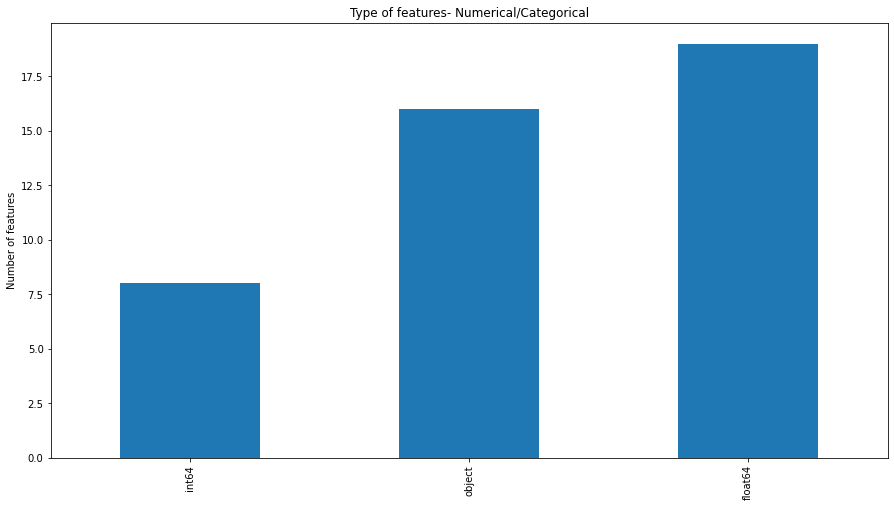

In [31]:

attr_type(datasets[ds_name])

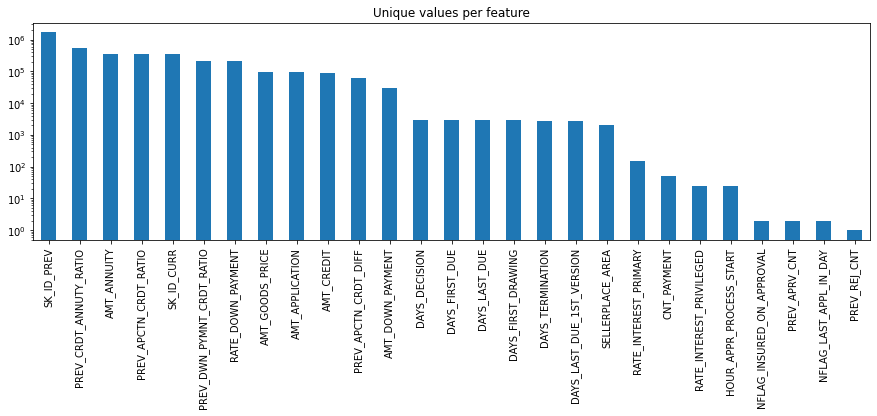

In [32]:
unique_values(datasets[ds_name]) 

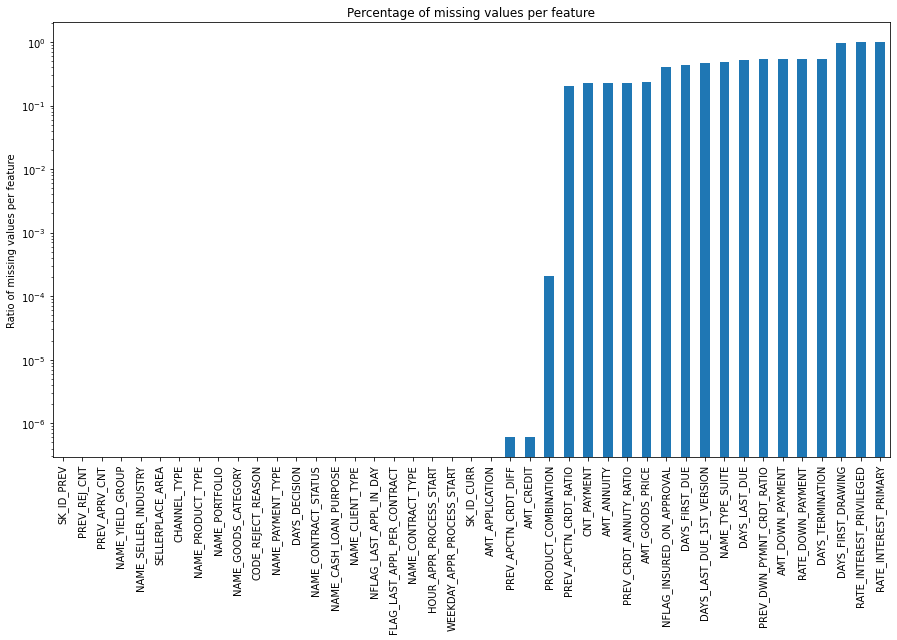

In [33]:
 percent_missing(datasets[ds_name])

In [60]:
#categorical_count(datasets[ds_name])

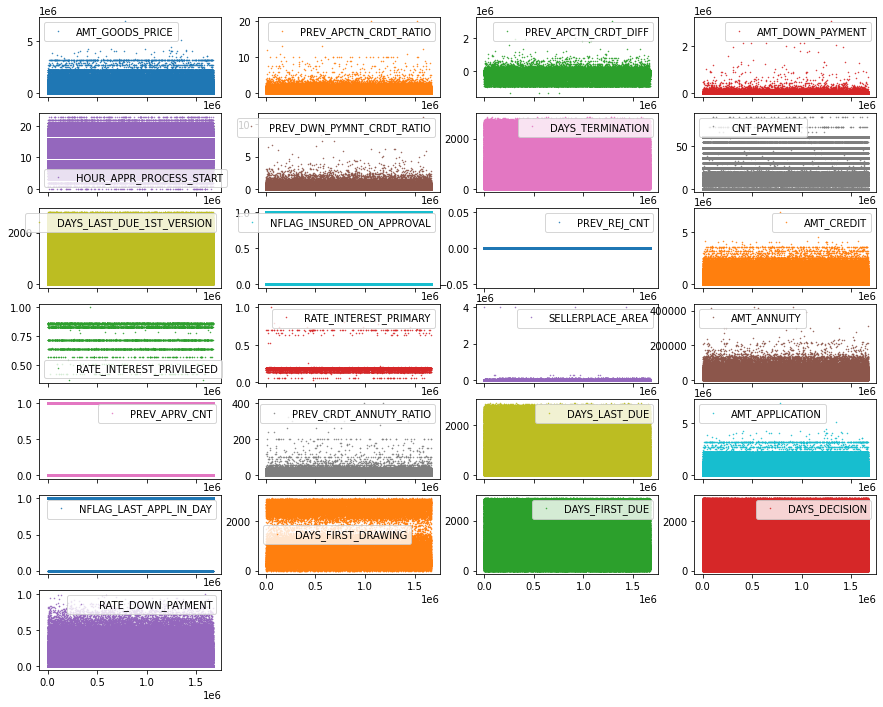

In [58]:
numerical_features(datasets[ds_name],only_num_cat)

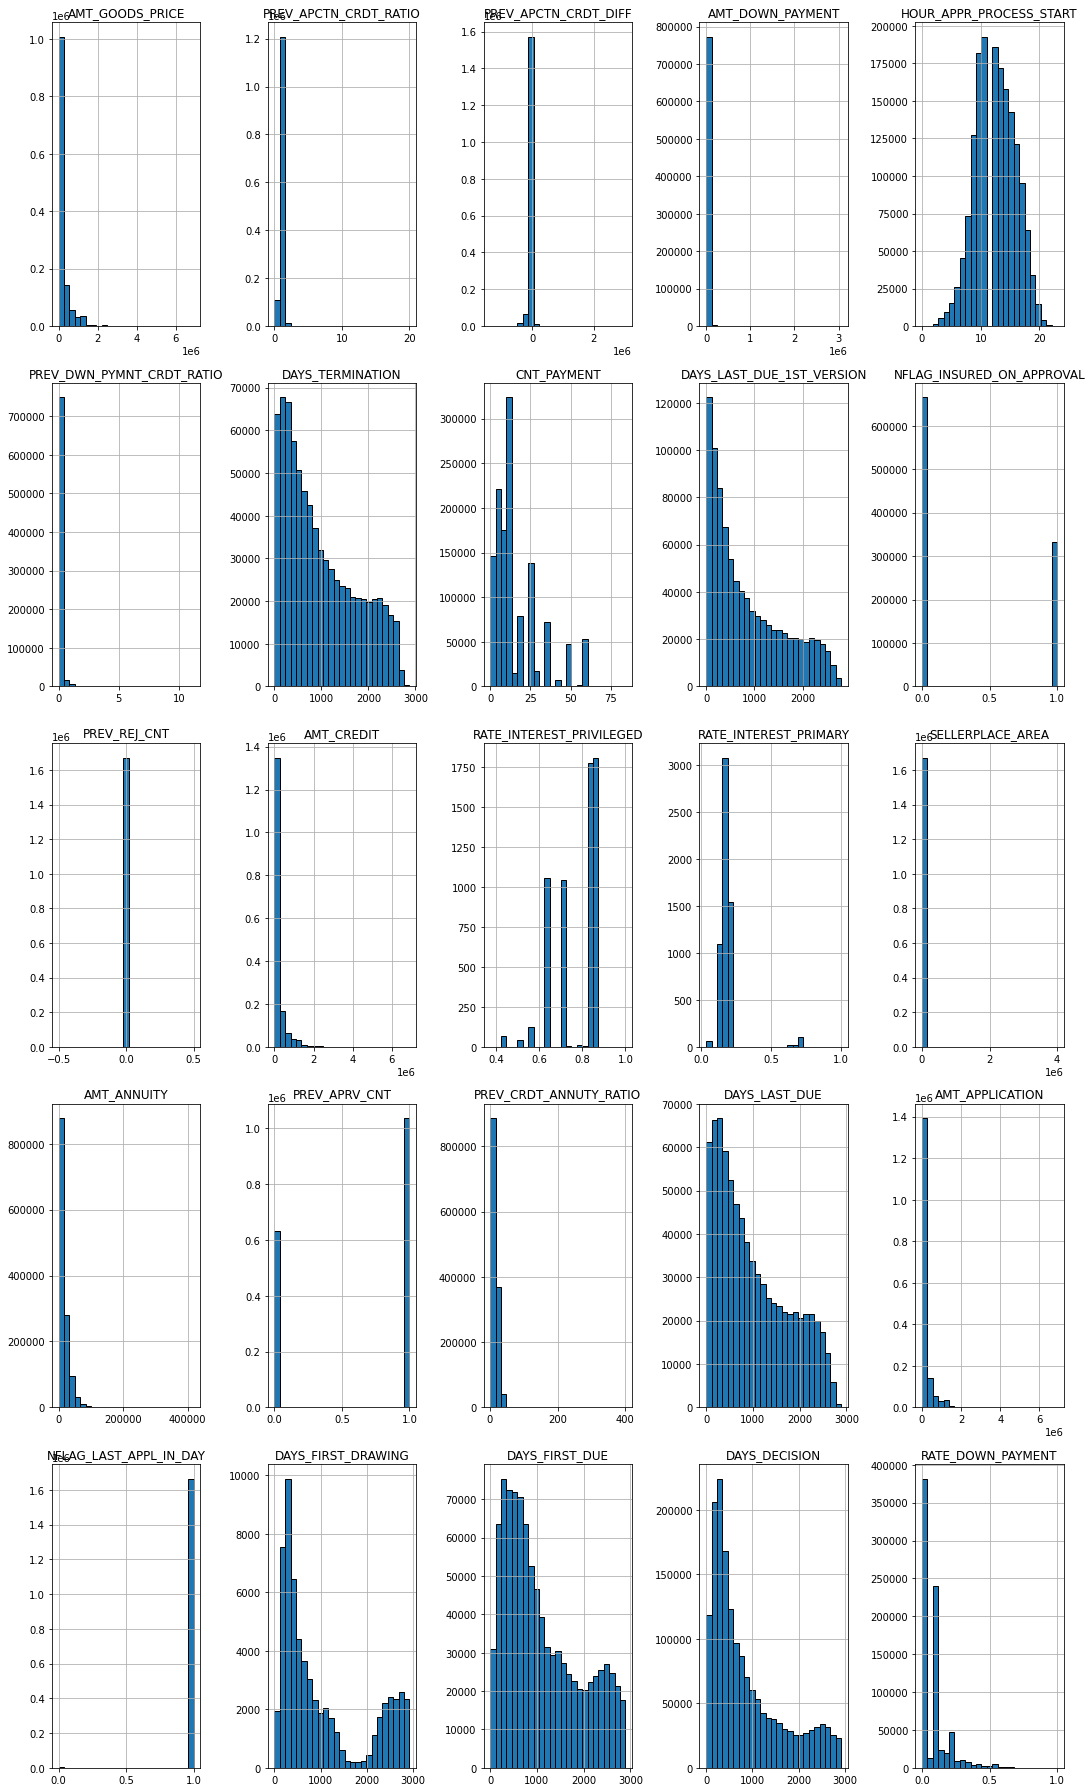

In [53]:
num_hist(datasets[ds_name][only_num_cat])

Text(0.5, 1.0, 'All features with missing data')

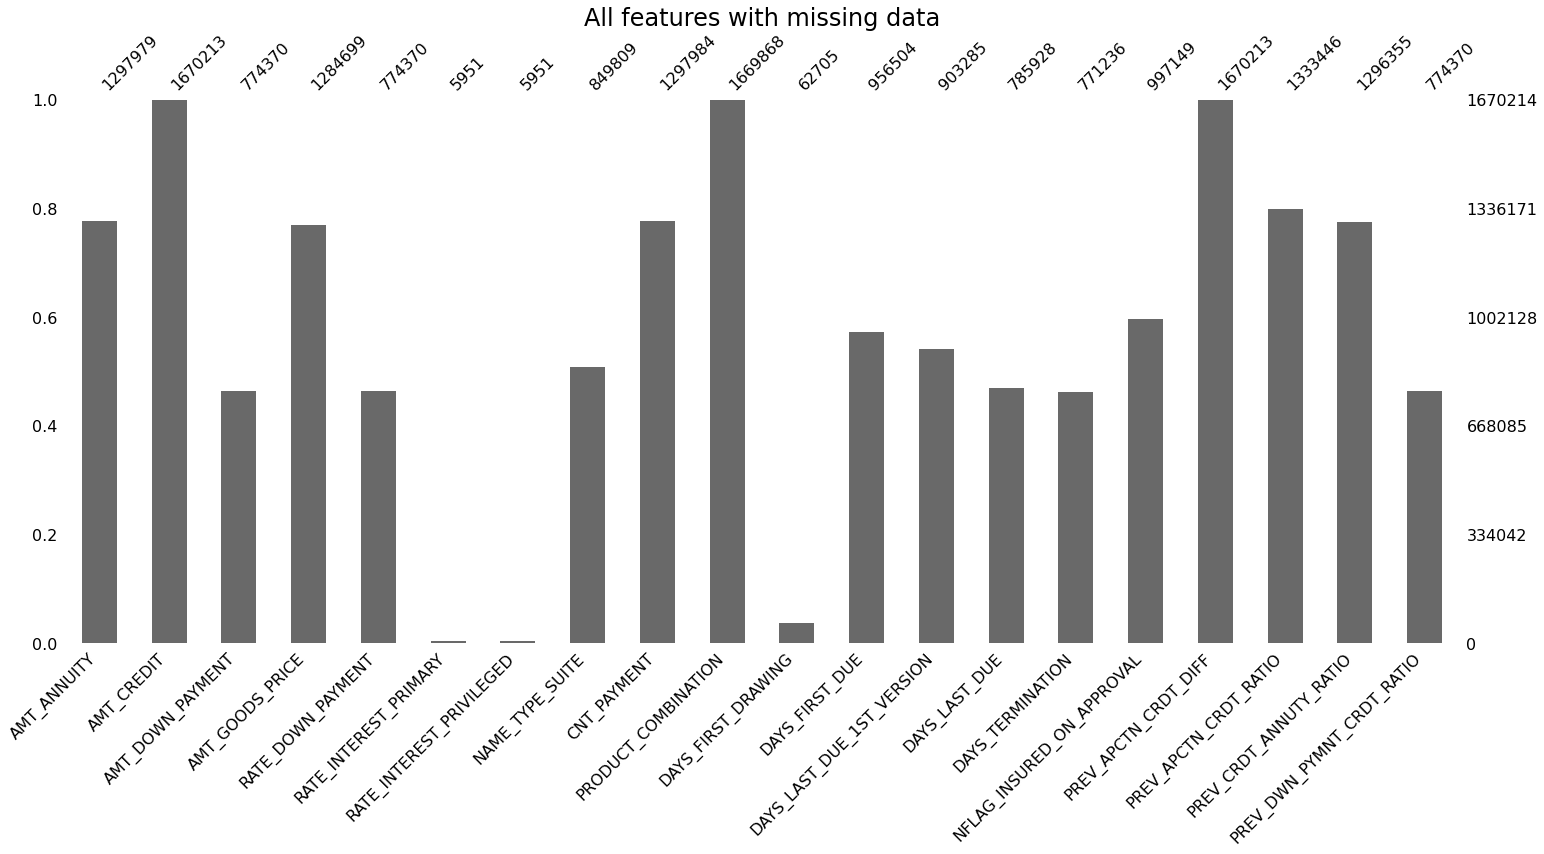

In [56]:
all_missing_values_plot(datasets[ds_name])

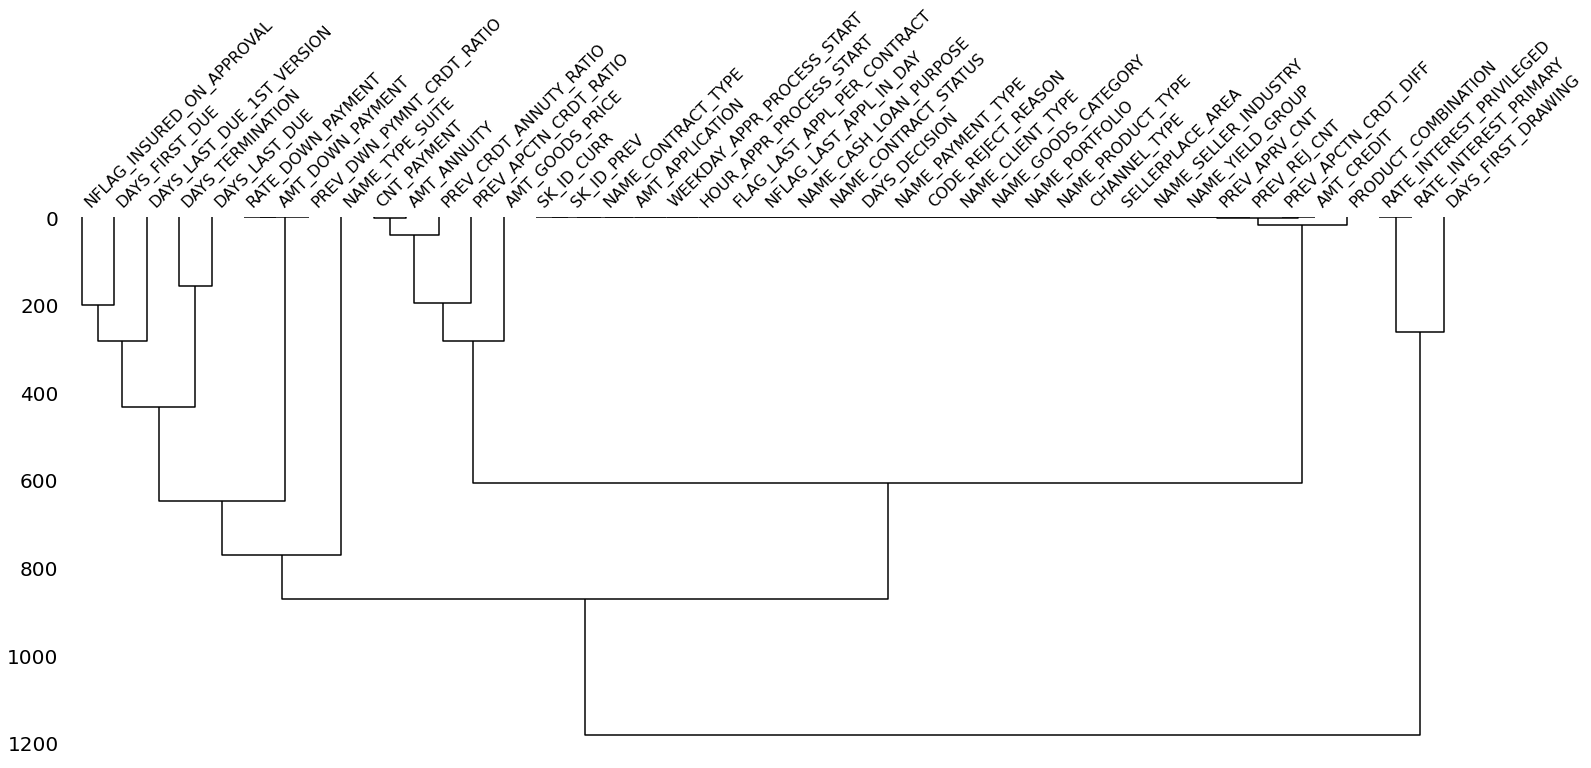

In [57]:
dendo(datasets[ds_name])

Table under consideration: PREVIOUS_APPLICATION
------------------------------------------------------------------------
--------
# of ID's: 1
 ID's: ['SK_ID_CURR']
--------
# of numerical   features: 27
Numerical   features: ['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'PREV_APRV_CNT', 'PREV_REJ_CNT', 'PREV_APCTN_CRDT_DIFF', 'PREV_APCTN_CRDT_RATIO', 'PREV_CRDT_ANNUTY_RATIO', 'PREV_DWN_PYMNT_CRDT_RATIO']
--------
# of categorical features: 16
Categorical features: ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMEN

KeyboardInterrupt: 

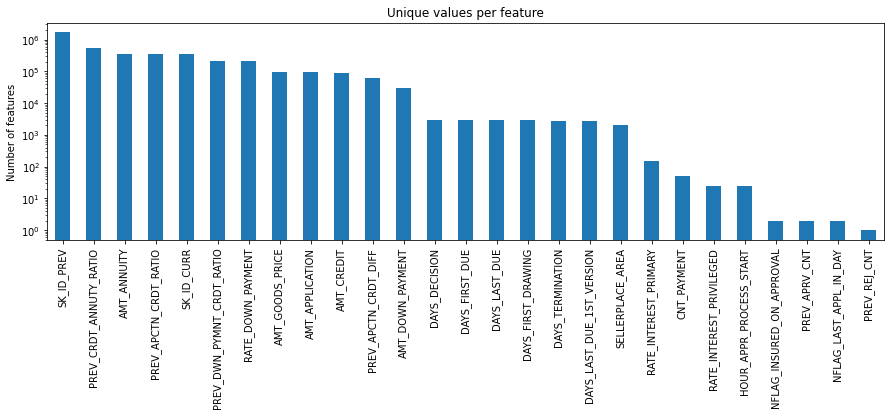

In [54]:
for i,ds_name in enumerate(datasets.keys()):
    
    #n = True
    #if n:
        
    if ds_name.upper() == 'PREVIOUS_APPLICATION':
        print("Table under consideration:",ds_name.upper())
        print("------------------------------------------------------------------------")
        id_cols, feat_num, feat_cat, features =  id_num_cat_feature(datasets[ds_name])
        only_num_cat = list(set(feat_num)-set(['SK_ID_CURR','SK_ID_PREV','SK_ID_BUREAU']))

        
        print("------------------------------------------------------------------------")
        print("-------------------------Type of Features-------------------------------")
        attr_type(datasets[ds_name])
        print("------------------------------------------------------------------------")
        print("-------------------------UNIQUE VALUES----------------------------------")
        unique_values(datasets[ds_name]) 
        print("------------------------------------------------------------------------")
        print("-------------------------MISSING PERCENTAGE-----------------------------")
        percent_missing(datasets[ds_name])
        print("------------------------------------------------------------------------")
        print("-------------------------CATEGORICAL COUNT------------------------------")
        #categorical_count(datasets[ds_name],feat_cat)
        print("------------------------------------------------------------------------")
        print("-------------------------NUM FEATURES-DOT-------------------------------")
        numerical_features(datasets[ds_name],only_num_cat)
        print("------------------------------------------------------------------------")
        print("-------------------------NUM FEATURES - HISTOGRAM ----------------------")
        num_hist(datasets[ds_name][only_num_cat])
        print("------------------------------------------------------------------------")
        print("-------------------------Continous Features ----------------------------")
        #continous_features(df_x,only_num_cat)
        print("------------------------------------------------------------------------")
        print("-------------------------All Missing Features---------------------------")
        all_missing_values_plot(datasets[ds_name])


#dendogram; groups together columns that have strong correlations in nullity.
#If a number of columns are grouped together at level zero, then the presence 
#of nulls in one of those columns is directly related to the presence or absence
#of nulls in the others columns. The more separated the columns in the tree, 
#the less likely the null values can be correlated between the columns.
dendo(datasets[ds_name])


## Coorelation- Training Data

<AxesSubplot:>

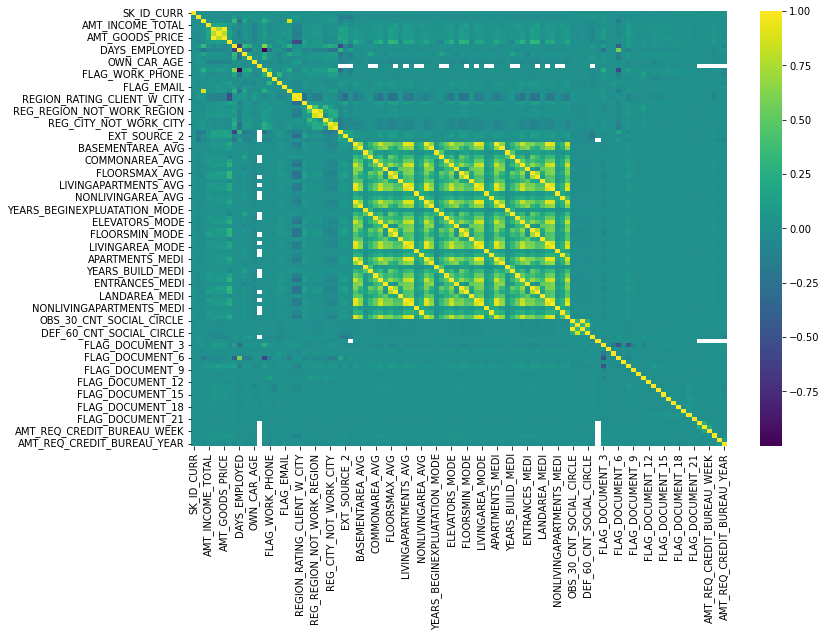

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(datasets["application_train"][numerical_ix].corr(), cmap="viridis")

## Check Skewness/Distribution : Numerical data

**Look for skewed column in numerical data but ignore dates, Days,Flags, status, ID's.**

**Skewness in : AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY**

In [16]:
datasets["application_train"][numerical_ix]

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
307506      456251       0             0          157500.0    254700.0   
307507      456252       0             0           72000.0    269550.0   
307508      456253       0             0          153000.0    677664.0   
307509      456254       1             0          171000.0    370107.0   
307510      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0           24700.5         351000.0                    0.018801       -9461   
1           35698.5        1129500.0                    0.003541      -16765   
2            6750.0         135000.0                    0.010032      -19046   
3           29686.5         297000.0                    0.008019      -19005   
4           21865.5         513000.0                    0.028663      -19932   
...             ...              ...                         ...         ...   
307506      27558.0         225000.0                    0.032561       -9327   
307507      12001.5         225000.0                    0.025164      -20775   
307508      29979.0         585000.0                    0.005002      -14966   
307509      20205.0         319500.0                    0.005313      -11961   
307510      49117.5         675000.0                    0.046220      -16856   

        DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                -637  ...                 0                 0   
1               -1188  ...                 0                 0   
2                -225  ...                 0                 0   
3               -3039  ...                 0                 0   
4               -3038  ...                 0                 0   
...               ...  ...               ...               ...   
307506           -236  ...                 0                 0   
307507         365243  ...                 0                 0   
307508          -7921  ...                 0                 0   
307509          -4786  ...                 0                 0   
307510          -1262  ...                 0                 0   

        FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      0                 0                         0.0   
1                      0                 0                         0.0   
2                      0                 0                         0.0   
3                      0                 0                         NaN   
4                      0                 0                         0.0   
...                  ...               ...                         ...   
307506                 0                 0                         NaN   
307507                 0                 0                         NaN   
307508                 0                 0                         1.0   
307509                 0                 0                         0.0   
307510                 0                 0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             NaN                         NaN   
4                             0.0                         0.0   
...                           ...                         ...   
307506               

**AMT_CREDIT and AMT_ANNUITY looks skewed. we wil do log transformation on these attributes and make them more mormalized.**

### AMT_CREDIT

Text(0.5, 1.0, 'Distribution - AMT_CREDIT ')

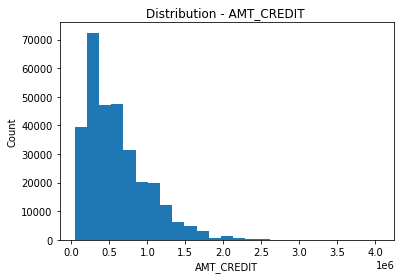

In [17]:
plt.hist(datasets["application_train"]['AMT_CREDIT'], bins=25);
plt.xlabel('AMT_CREDIT')
plt.ylabel('Count')
plt.title("Distribution - AMT_CREDIT ")

Text(0.5, 1.0, 'Distribution - Log(AMT_CREDIT) ')

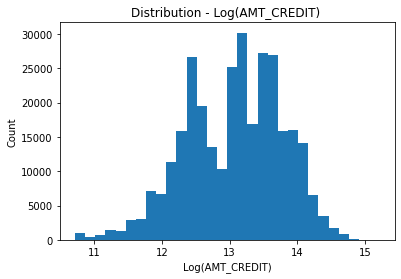

In [18]:
plt.hist(np.log(datasets["application_train"]['AMT_CREDIT']), bins=30);
plt.xlabel('Log(AMT_CREDIT)')
plt.ylabel('Count')
plt.title("Distribution - Log(AMT_CREDIT) ")

### AMT_ANNUITY

Text(0.5, 1.0, 'Distribution - AMT_ANNUITY ')

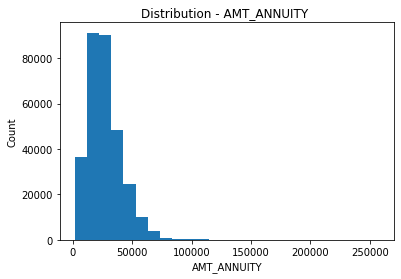

In [19]:
plt.hist(datasets["application_train"]['AMT_ANNUITY'], bins=25);
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Count')
plt.title("Distribution - AMT_ANNUITY ")

Text(0.5, 1.0, 'Distribution - Log(AMT_ANNUITY) ')

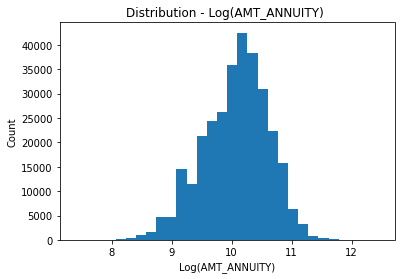

In [20]:
plt.hist(np.log(datasets["application_train"]['AMT_ANNUITY']), bins=30);
plt.xlabel('Log(AMT_ANNUITY)')
plt.ylabel('Count')
plt.title("Distribution - Log(AMT_ANNUITY) ")

## Missing data for application train

In [21]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)


Percent  Train Missing Count
COMMONAREA_MEDI             69.87               214865
COMMONAREA_AVG              69.87               214865
COMMONAREA_MODE             69.87               214865
NONLIVINGAPARTMENTS_MODE    69.43               213514
NONLIVINGAPARTMENTS_AVG     69.43               213514
NONLIVINGAPARTMENTS_MEDI    69.43               213514
FONDKAPREMONT_MODE          68.39               210295
LIVINGAPARTMENTS_MODE       68.35               210199
LIVINGAPARTMENTS_AVG        68.35               210199
LIVINGAPARTMENTS_MEDI       68.35               210199
FLOORSMIN_AVG               67.85               208642
FLOORSMIN_MODE              67.85               208642
FLOORSMIN_MEDI              67.85               208642
YEARS_BUILD_MEDI            66.50               204488
YEARS_BUILD_MODE            66.50               204488
YEARS_BUILD_AVG             66.50               204488
OWN_CAR_AGE                 65.99               202929
LANDAREA_MEDI               59.38               182590
LANDAREA_MODE               59.38               182590
LANDAREA_AVG                59.38               182590

### Determine more than 50% null

Determine attributes which have more than 50% NULLS. Once done, these will be used as part of feature engineering.

In [22]:
nulls_50 = missing_application_train_data[round(missing_application_train_data['Percent']>50.0)==True]
#nulls_50.index

remove_num_nulls = list(set(nulls_50.index).intersection(set(numerical_ix)))
remove_cat_nulls = list(set(nulls_50.index).intersection(set(categorical_ix)))

In [23]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

Percent  Test Missing Count
COMMONAREA_AVG              68.72               33495
COMMONAREA_MODE             68.72               33495
COMMONAREA_MEDI             68.72               33495
NONLIVINGAPARTMENTS_AVG     68.41               33347
NONLIVINGAPARTMENTS_MODE    68.41               33347
NONLIVINGAPARTMENTS_MEDI    68.41               33347
FONDKAPREMONT_MODE          67.28               32797
LIVINGAPARTMENTS_AVG        67.25               32780
LIVINGAPARTMENTS_MODE       67.25               32780
LIVINGAPARTMENTS_MEDI       67.25               32780
FLOORSMIN_MEDI              66.61               32466
FLOORSMIN_AVG               66.61               32466
FLOORSMIN_MODE              66.61               32466
OWN_CAR_AGE                 66.29               32312
YEARS_BUILD_AVG             65.28               31818
YEARS_BUILD_MEDI            65.28               31818
YEARS_BUILD_MODE            65.28               31818
LANDAREA_MEDI               57.96               28254
LANDAREA_AVG                57.96               28254
LANDAREA_MODE               57.96               28254

## Distribution of the target column 

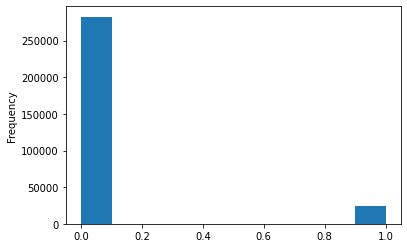

In [24]:
datasets["application_train"]['TARGET'].astype(int).plot.hist();

**This shows that around 8% of people are not able to repay the loans back.**

In [25]:
datasets["application_train"]['TARGET'].value_counts()/datasets["application_train"]['TARGET'].shape[0]

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

## Correlation with  the target column 

In [26]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


## Applicants Age 

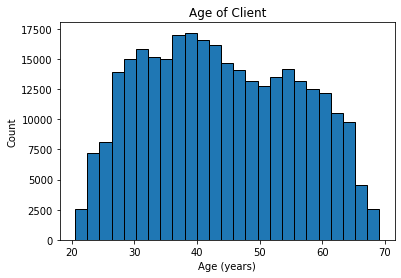

In [27]:
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

## Applicants occupations

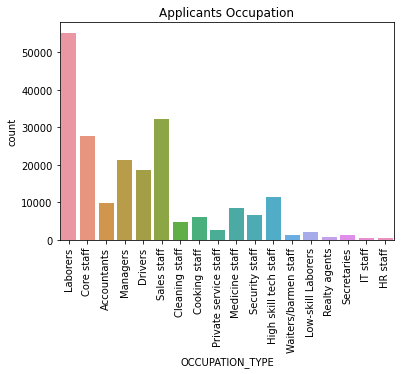

In [28]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

**17% of our applicants are labourers and around 10% are from the Sales. This seems like folks which are from the lower income range which apply for the loan.**

In [29]:
100* datasets["application_train"]['OCCUPATION_TYPE'].value_counts()/datasets["application_train"]['OCCUPATION_TYPE'].shape[0]

Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

# Dataset questions
## Unique record for each SK_ID_CURR

## previous applications for the submission file
The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [49]:
appsDF = datasets["previous_application"]

In [50]:
len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"]))

47800

In [51]:
print(f"There are  {appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [52]:
# How many entries are there for each month?
prevAppCounts = appsDF['SK_ID_CURR'].value_counts(dropna=False)
#appsDF
prevAppCounts

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

In [53]:
len(prevAppCounts[prevAppCounts >40])  #more that 40 previous applications

101

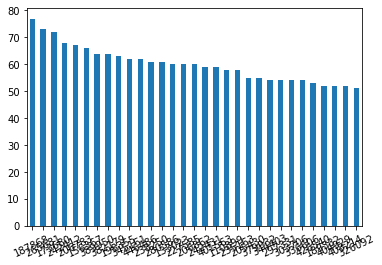

In [54]:
prevAppCounts[prevAppCounts >50].plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

### Histogram of Number of previous applications for an ID

In [55]:
sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

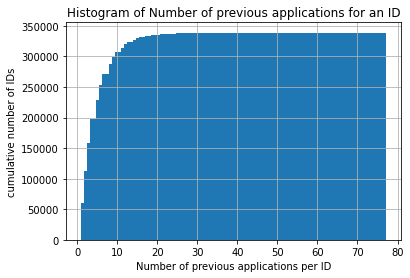

In [56]:
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')


##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [57]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
#print(apps_5plus)
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
apps_med_plus = 100 - apps_5plus- apps_40plus
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 11 to 39 no of apps:', np.round(100-(100.*(sum(apps_5plus)/apps_all))-(100.*(sum(apps_40plus)/apps_all)),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))


Percentage with 10 or more previous apps: 41.76895
Percentage with 11 to 39 no of apps: 58.19653
Percentage with 40 or more previous apps: 0.03453


In [58]:
df1 = pd.DataFrame(prevAppCounts)
df1

SK_ID_CURR
187868          77
265681          73
173680          72
242412          68
206783          67
...            ...
135285           1
311960           1
427136           1
241434           1
191629           1

[338857 rows x 1 columns]

# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

In [59]:
 pd.DataFrame(prevAppCounts)

SK_ID_CURR
187868          77
265681          73
173680          72
242412          68
206783          67
...            ...
135285           1
311960           1
427136           1
241434           1
191629           1

[338857 rows x 1 columns]

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


## agg detour

Aggregate using one or more operations over the specified axis.

For more details see [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
```python
DataFrame.agg(func, axis=0, *args, **kwargs**)
```
Aggregate using one or more operations over the specified axis.


In [60]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

### Multiple condition expressions in Pandas
So far, both our boolean selections have involved a single condition. You can, of course, have as many conditions as you would like. To do so, you will need to combine your boolean expressions using the three logical operators and, or and not.

Use &, | , ~
Although Python uses the syntax and, or, and not, these will not work when testing multiple conditions with pandas. The details of why are explained [here](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-39e811c81a0c).

You must use the following operators with pandas:

* & for and
* | for or
* ~ for not

## Missing values in prevApps

In [61]:
appsDF.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [62]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

## feature engineering for prevApp table

In [63]:
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
print(f"{appsDF[features].describe()}")
agg_ops = ["min", "max", "mean"]
result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg("mean") #group by ID
display(result.head())
print("-"*50)
result = appsDF.groupby(["SK_ID_CURR"], as_index=False).agg({'AMT_ANNUITY' : agg_ops, 'AMT_APPLICATION' : agg_ops})
result.columns = result.columns.map('_'.join)
display(result)
result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
print(f"result.shape: {result.shape}")
result[0:10]

        AMT_ANNUITY  AMT_APPLICATION
count  1.297979e+06     1.670214e+06
mean   1.595512e+04     1.752339e+05
std    1.478214e+04     2.927798e+05
min    0.000000e+00     0.000000e+00
25%    6.321780e+03     1.872000e+04
50%    1.125000e+04     7.104600e+04
75%    2.065842e+04     1.803600e+05
max    4.180581e+05     6.905160e+06


SK_ID_CURR    SK_ID_PREV  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0      100001  1.369693e+06     3951.000         24835.50    23787.00   
1      100002  1.038818e+06     9251.775        179055.00   179055.00   
2      100003  2.281150e+06    56553.990        435436.50   484191.00   
3      100004  1.564014e+06     5357.250         24282.00    20106.00   
4      100005  2.176837e+06     4813.200         22308.75    20076.75   

   AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
0            2520.0          24835.5                13.000000   
1               0.0         179055.0                 9.000000   
2            3442.5         435436.5                14.666667   
3            4860.0          24282.0                 5.000000   
4            4464.0          44617.5                10.500000   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  ...  RATE_INTEREST_PRIVILEGED  \
0                     1.0           0.104326  ...                       NaN   
1                     1.0           0.000000  ...                       NaN   
2                     1.0           0.050030  ...                       NaN   
3                     1.0           0.212008  ...                       NaN   
4                     1.0           0.108964  ...                       NaN   

   DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DRAWING  \
0        -1740.0              23.0          8.0            365243.0   
1         -606.0             500.0         24.0            365243.0   
2        -1305.0             533.0         10.0            365243.0   
3         -815.0              30.0          4.0            365243.0   
4         -536.0              18.0         12.0            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0    -1709.000000               -1499.000000   -1619.000000      -1612.000000   
1     -565.000000                 125.000000     -25.000000        -17.000000   
2    -1274.333333               -1004.333333   -1054.333333      -1047.333333   
3     -784.000000                -694.000000    -724.000000       -714.000000   
4     -706.000000                -376.000000    -466.000000       -460.000000   

   NFLAG_INSURED_ON_APPROVAL  
0                   0.000000  
1                   0.000000  
2                   0.666667  
3                   0.000000  
4                   0.000000  

[5 rows x 21 columns]

--------------------------------------------------


SK_ID_CURR_  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0            100001         3951.000         3951.000       3951.000000   
1            100002         9251.775         9251.775       9251.775000   
2            100003         6737.310        98356.995      56553.990000   
3            100004         5357.250         5357.250       5357.250000   
4            100005         4813.200         4813.200       4813.200000   
...             ...              ...              ...               ...   
338852       456251         6605.910         6605.910       6605.910000   
338853       456252        10074.465        10074.465      10074.465000   
338854       456253         3973.095         5567.715       4770.405000   
338855       456254         2296.440        19065.825      10681.132500   
338856       456255         2250.000        54022.140      20775.391875   

        AMT_APPLICATION_min  AMT_APPLICATION_max  AMT_APPLICATION_mean  
0                   24835.5              24835.5             24835.500  
1                  179055.0             179055.0            179055.000  
2                   68809.5             900000.0            435436.500  
3                   24282.0              24282.0             24282.000  
4                       0.0              44617.5             22308.750  
...                     ...                  ...                   ...  
338852              40455.0              40455.0             40455.000  
338853              57595.5              57595.5             57595.500  
338854              19413.0              28912.5             24162.750  
338855              18846.0             223789.5            121317.750  
338856              45000.0            1170000.0            362770.875  

[338857 rows x 7 columns]

result.shape: (338857, 8)


SK_ID_CURR_  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0       100001         3951.000         3951.000       3951.000000   
1       100002         9251.775         9251.775       9251.775000   
2       100003         6737.310        98356.995      56553.990000   
3       100004         5357.250         5357.250       5357.250000   
4       100005         4813.200         4813.200       4813.200000   
5       100006         2482.920        39954.510      23651.175000   
6       100007         1834.290        22678.785      12278.805000   
7       100008         8019.090        25309.575      15839.696250   
8       100009         7435.845        17341.605      10051.412143   
9       100010        27463.410        27463.410      27463.410000   

   AMT_APPLICATION_min  AMT_APPLICATION_max  AMT_APPLICATION_mean  \
0              24835.5              24835.5          24835.500000   
1             179055.0             179055.0         179055.000000   
2              68809.5             900000.0         435436.500000   
3              24282.0              24282.0          24282.000000   
4                  0.0              44617.5          22308.750000   
5                  0.0             688500.0         272203.260000   
6              17176.5             247500.0         150530.250000   
7                  0.0             450000.0         155701.800000   
8              40455.0             110160.0          76741.714286   
9             247212.0             247212.0         247212.000000   

   range_AMT_APPLICATION  
0                    0.0  
1                    0.0  
2               831190.5  
3                    0.0  
4                44617.5  
5               688500.0  
6               230323.5  
7               450000.0  
8                69705.0  
9                    0.0

In [64]:
result.isna().sum()

SK_ID_CURR_                0
AMT_ANNUITY_min          480
AMT_ANNUITY_max          480
AMT_ANNUITY_mean         480
AMT_APPLICATION_min        0
AMT_APPLICATION_max        0
AMT_APPLICATION_mean       0
range_AMT_APPLICATION      0
dtype: int64

In [65]:
result

SK_ID_CURR_  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0            100001         3951.000         3951.000       3951.000000   
1            100002         9251.775         9251.775       9251.775000   
2            100003         6737.310        98356.995      56553.990000   
3            100004         5357.250         5357.250       5357.250000   
4            100005         4813.200         4813.200       4813.200000   
...             ...              ...              ...               ...   
338852       456251         6605.910         6605.910       6605.910000   
338853       456252        10074.465        10074.465      10074.465000   
338854       456253         3973.095         5567.715       4770.405000   
338855       456254         2296.440        19065.825      10681.132500   
338856       456255         2250.000        54022.140      20775.391875   

        AMT_APPLICATION_min  AMT_APPLICATION_max  AMT_APPLICATION_mean  \
0                   24835.5              24835.5             24835.500   
1                  179055.0             179055.0            179055.000   
2                   68809.5             900000.0            435436.500   
3                   24282.0              24282.0             24282.000   
4                       0.0              44617.5             22308.750   
...                     ...                  ...                   ...   
338852              40455.0              40455.0             40455.000   
338853              57595.5              57595.5             57595.500   
338854              19413.0              28912.5             24162.750   
338855              18846.0             223789.5            121317.750   
338856              45000.0            1170000.0            362770.875   

        range_AMT_APPLICATION  
0                         0.0  
1                         0.0  
2                    831190.5  
3                         0.0  
4                     44617.5  
...                       ...  
338852                    0.0  
338853                    0.0  
338854                 9499.5  
338855               204943.5  
338856              1125000.0  

[338857 rows x 8 columns]

## feature transformer for prevApp table

In [66]:
# Create aggregate features (via pipeline)
class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
    
        self.features = features
        self.agg_ops = ["min", "max", "mean"]



    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"], as_index=False).agg({ft:self.agg_ops for ft in self.features})
        result.columns = result.columns.map(lambda ct: '_'.join([x for x in ct if x != '']))
        
        if 'AMT_APPLICATION' in features:
            result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
        return result 
        
    

from sklearn.pipeline import make_pipeline 
def test_driver_prevAppsFeaturesAggregater(df, features):
    print(f"df.shape: {df.shape}\n")
    print(f"df[{features}][0:5]: \n{df[features][0:5]}")
    test_pipeline = make_pipeline(prevAppsFeaturesAggregater(features))
    return(test_pipeline.fit_transform(df))

## Sd - removed name payment type for now.
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
features = ['AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', #'NAME_PAYMENT_TYPE',
       'CNT_PAYMENT', 
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']
#features = ['AMT_ANNUITY', 'AMT_APPLICATION']
res = test_driver_prevAppsFeaturesAggregater(appsDF, features)
print(f"HELLO")
print(f"Test driver: \n{res[0:10]}")
print(f"input[features][0:10]: \n{appsDF[0:10]}")

# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


df.shape: (1670214, 37)

df[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']][0:5]: 
   AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  \
0     1730.430          17145.0     17145.0               0.0   
1    25188.615         607500.0    679671.0               NaN   
2    15060.735         112500.0    136444.5               NaN   
3    47041.335         450000.0    470790.0               NaN   
4    31924.395         337500.0    404055.0               NaN   

   AMT_GOODS_PRICE  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0          17145.0                0.0               0.182832   
1         607500.0                NaN                    NaN   
2         112500.0                NaN                    NaN   
3         450000.

## Join the labeled dataset

In [67]:
prevApps_aggregated = prevAppsFeaturesAggregater(features).transform(appsDF)


In [68]:
prevApps_aggregated['prev_app_cnt'] = pd.DataFrame(prevAppCounts)

In [69]:
prevApps_aggregated['prev_app_cnt']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
338852     3.0
338853    13.0
338854     6.0
338855    13.0
338856     4.0
Name: prev_app_cnt, Length: 338857, dtype: float64

In [70]:

appTrain = datasets['application_train']
appTest = datasets['application_test']
y_train = appTrain['TARGET']
X_train = appTrain
appTrain = appTrain.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')
appTest = appTest.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')

In [71]:
X_kaggle_test= appTest

In [73]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

## Join the unlabeled dataset (i.e., the submission file)

In [74]:
# approval rate 'NFLAG_INSURED_ON_APPROVAL'

In [75]:
# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X
    
    


# Processing pipeline

###  OHE when previously unseen unique values in the test/validation set

Train, validation and Test sets (and the leakage problem we have mentioned previously):

 

Let's look at a small usecase to tell us how to deal with this:

* The OneHotEncoder is fitted to the training set, which means that for each unique value present in the training set, for each feature, a new column is created. Let's say we have 39 columns after the encoding up from 30 (before preprocessing).
* The output is a numpy array (when the option sparse=False is used), which has the disadvantage of losing all the information about the original column names and values.
* When we try to transform the test set, after having fitted the encoder to the training set, we obtain a `ValueError`. This is because the there are new, previously unseen unique values in the test set and the encoder doesn’t know how to handle these values. In order to use both the transformed training and test sets in machine learning algorithms, we need them to have the same number of columns.

This last problem can be solved by using the option handle_unknown='ignore'of the OneHotEncoder, which, as the name suggests, will ignore previously unseen values when transforming the test set.

 

Here is a example that in action:

```python
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

```


In [76]:
datasets["application_train"]['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

Please [this  blog](https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d) for more details of OHE when the validation/test have previously unseen unique values.

## HCDR preprocessing

In [77]:
# Split the provided training data into training and validationa and test
# The kaggle evaluation test set has no labels
#
from sklearn.model_selection import train_test_split


appTrain = datasets['application_train']
appTest = datasets['application_test']
y_train = appTrain['TARGET']
X_train = appTrain
appTrain = appTrain.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')
appTest = appTest.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')

use_application_data_ONLY = False#use joined data
if use_application_data_ONLY:
    # just selected a few features for a baseline experiment
    selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
    X_train = datasets["application_train"][selected_features]
    y_train = datasets["application_train"]['TARGET']
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_kaggle_test= datasets["application_test"][selected_features]
    # y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
y_train = X_train['TARGET']
X_train = X_train[selected_features]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= X_kaggle_test[selected_features]
# y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

    
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (222176, 14)
X validation      shape: (46127, 14)
X test            shape: (39208, 14)
X X_kaggle_test   shape: (48744, 14)


In [78]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

# Creates the following date features
# But could do so much more with these features
#    E.g., 
#      extract the domain address of the homepage and OneHotEncode it
# 
# ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
        #df.drop(self.features, axis=1, inplace=True)
        return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol
    

from sklearn.pipeline import make_pipeline 
features = ["OCCUPATION_TYPE"]
def test_driver_prep_OCCUPATION_TYPE():
    print(f"X_train.shape: {X_train.shape}\n")
    print(f"X_train['name'][0:5]: \n{X_train[features][0:5]}")
    test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features))
    return(test_pipeline.fit_transform(X_train))
          
x = test_driver_prep_OCCUPATION_TYPE()
print(f"Test driver: \n{test_driver_prep_OCCUPATION_TYPE()[0:10, :]}")
print(f"X_train['name'][0:10]: \n{X_train[features][0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


X_train.shape: (222176, 14)

X_train['name'][0:5]: 
       OCCUPATION_TYPE
21614      Sales staff
209797        Laborers
17976              NaN
282543  Security staff
52206              NaN
X_train.shape: (222176, 14)

X_train['name'][0:5]: 
       OCCUPATION_TYPE
21614      Sales staff
209797        Laborers
17976              NaN
282543  Security staff
52206              NaN
Test driver: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]
X_train['name'][0:10]: 
       OCCUPATION_TYPE
21614      Sales staff
209797        Laborers
17976              NaN
282543  Security staff
52206              NaN
152195        Managers
70364       Core staff
11643              NaN
45591       Core staff
93535         Laborers


In [79]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

# Baseline Model

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

## Baseline with 14 features

In [80]:
# Identify the numeric features we wish to consider. 
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

num_attribs = [
    'AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
    'EXT_SOURCE_2','EXT_SOURCE_3']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

selected_features = num_attribs + cat_attribs
# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_pipeline = ColumnTransformer(transformers=[
        ("num_pipeline", num_pipeline, num_attribs),
        ("cat_pipeline", cat_pipeline, cat_attribs)],
        remainder='drop',
        n_jobs=-1
    )


full_pipeline_with_predictor = Pipeline([
        ("preparation", data_pipeline),
        ("linear", LogisticRegression())
    ])

param_grid = {'linear__penalty':[#'l1', 'l2', 'elasticnet',
                                 'none']
              #,'linear__C':[1.0#, 10.0, 100.0 ]
             }

gd2 = GridSearchCV(full_pipeline_with_predictor, param_grid= param_grid, cv = 5, n_jobs=-1, scoring='roc_auc')

model = gd2.fit(X_train, y_train)


try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])

exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog


exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_14_features     0.9198     0.9192     0.9158     0.7358   

   Valid AUC  Test  AUC  
0     0.7358     0.7357

## Split train, validation and test sets

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = datasets["application_train"]
y = data['TARGET']
X = data.drop(['SK_ID_CURR', 'TARGET'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

X train           shape: (209107, 120)
X validation      shape: (52277, 120)
X test            shape: (46127, 120)


## Baseline 2:  All features

In [82]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


data = datasets["application_train"]
y = data['TARGET']
X = data.drop(['SK_ID_CURR', 'TARGET'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

numerical_features = list(numerical_ix[2:])

num_pipeline =Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
categorical_features = list(categorical_ix)

selected_features = (numerical_features) + (categorical_features)

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


data_pipeline = ColumnTransformer(transformers=[
        ("num_pipeline", num_pipeline, numerical_features),
        ("cat_pipeline", cat_pipeline, categorical_features)],
        remainder='drop',
        n_jobs=-1
    )


full_pipeline_with_predictor = Pipeline([
        ("preparation", data_pipeline),
        ("linear", LogisticRegression())
    ])

param_grid = {'linear__penalty':[#'l1', 'l2', 'elasticnet',
                                 'none']
              #,'linear__C':[1.0#, 10.0, 100.0]
             }

gd1 = GridSearchCV(full_pipeline_with_predictor, param_grid= param_grid, cv = 5, n_jobs=-1, scoring='roc_auc')

model = gd1.fit(X_train, y_train)


try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])

exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

X train           shape: (209107, 120)
X validation      shape: (52277, 120)
X test            shape: (46127, 120)


exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0   Baseline_14_features     0.9198     0.9192     0.9158     0.7358   
1  Baseline_120_features     0.9200     0.9163     0.9193     0.7478   

   Valid AUC  Test  AUC  
0     0.7358     0.7357  
1     0.7472     0.7434

## Baseline 3: 79 Features
**Selected Features**

**Remove elements with more than 50% nulls**

In [83]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


data = datasets["application_train"]
y = data['TARGET']
X = data.drop(['SK_ID_CURR', 'TARGET'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

numerical_features = list(numerical_ix[2:].drop(remove_num_nulls))

num_pipeline =Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
categorical_features = list(categorical_ix.drop(remove_cat_nulls))

selected_features = (numerical_features) + (categorical_features)

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


data_pipeline = ColumnTransformer(transformers=[
        ("num_pipeline", num_pipeline, numerical_features),
        ("cat_pipeline", cat_pipeline, categorical_features)],
        remainder='drop',
        n_jobs=-1
    )


full_pipeline_with_predictor = Pipeline([
        ("preparation", data_pipeline),
        ("linear", LogisticRegression())
    ])

param_grid = {'linear__penalty':[#'l1', 'l2', 'elasticnet',
                                 'none']
              #,'linear__C':[1.0#, 10.0, 100.0]
                            }

gd3 = GridSearchCV(full_pipeline_with_predictor, param_grid= param_grid, cv = 5, n_jobs=-1, scoring='roc_auc')

model = gd3.fit(X_train, y_train)


try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])

exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

X train           shape: (209107, 120)
X validation      shape: (52277, 120)
X test            shape: (46127, 120)


exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0   Baseline_14_features     0.9198     0.9192     0.9158     0.7358   
1  Baseline_120_features     0.9200     0.9163     0.9193     0.7478   
2   Baseline_79_features     0.9200     0.9164     0.9195     0.7441   

   Valid AUC  Test  AUC  
0     0.7358     0.7357  
1     0.7472     0.7434  
2     0.7442     0.7406

## Baseline 4 : 79 features; 2 log features

**Remove elements with more than 50% nulls with log AMT_ANNUITY and AMT_CREDIT **

In [84]:

data = datasets["application_train"]
y = data['TARGET']
X = data.drop(['SK_ID_CURR', 'TARGET'], axis = 1) #drop some features with questionable value
X['LOG_AMT_ANNUITY'] = np.log(X['AMT_ANNUITY']) #add LOG_AMT_ANNUITY colunm
X = X.drop(['AMT_ANNUITY'], axis = 1) # drop AMT_ANNUITY colunm
X['LOG_AMT_CREDIT'] = np.log(X['AMT_CREDIT']) #add LOG_AMT_ANNUITY colunm
X = X.drop(['AMT_CREDIT'], axis = 1) # drop AMT_ANNUITY colunm

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

numerical_features = list(numerical_ix[2:].drop(remove_num_nulls))
numerical_features.append('LOG_AMT_ANNUITY')
numerical_features.append('LOG_AMT_CREDIT')
numerical_features.remove('AMT_CREDIT')
numerical_features.remove('AMT_ANNUITY')


num_pipeline =Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
     
categorical_features =  list(categorical_ix.drop(remove_cat_nulls))

selected_features = (numerical_features) + (categorical_features)

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


data_pipeline = ColumnTransformer(transformers=[
        ("num_pipeline", num_pipeline, numerical_features),
        ("cat_pipeline", cat_pipeline, categorical_features)],
        remainder='drop',
        n_jobs=-1
    )


full_pipeline_with_predictor = Pipeline([
        ("preparation", data_pipeline),
        ("linear", LogisticRegression())
    ])

param_grid = {'linear__penalty':[#'l1', 'l2', 'elasticnet',
                                 'none']
              #,'linear__C':[1.0#, 10.0, 100.0]
             }

gd4 = GridSearchCV(full_pipeline_with_predictor, param_grid= param_grid, cv = 5, n_jobs=-1, scoring='roc_auc')

model = gd4.fit(X_train, y_train)


try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])

exp_name = f"Baseline_{len(selected_features)}_features with log attributes"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

X train           shape: (209107, 120)
X validation      shape: (52277, 120)
X test            shape: (46127, 120)


exp_name  Train Acc  Valid Acc  Test  Acc  \
0                      Baseline_14_features     0.9198     0.9192     0.9158   
1                     Baseline_120_features     0.9200     0.9163     0.9193   
2                      Baseline_79_features     0.9200     0.9164     0.9195   
3  Baseline_79_features with log attributes     0.9200     0.9164     0.9195   

   Train AUC  Valid AUC  Test  AUC  
0     0.7358     0.7358     0.7357  
1     0.7478     0.7472     0.7434  
2     0.7441     0.7442     0.7406  
3     0.7443     0.7447     0.7405

# Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [85]:
data_test = datasets["application_test"]
print(data_test.shape)

X_Kaggle_test = data_test.drop('SK_ID_CURR', axis = 1)
test_class_scores = gd3.predict_proba(X_Kaggle_test)[:, 1]

submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

(48744, 121)


SK_ID_CURR    TARGET
0      100001  0.079261
1      100005  0.256575
2      100013  0.050367
3      100028  0.029005
4      100038  0.096225

In [86]:
submit_df.to_csv("submission.csv",index=False)

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

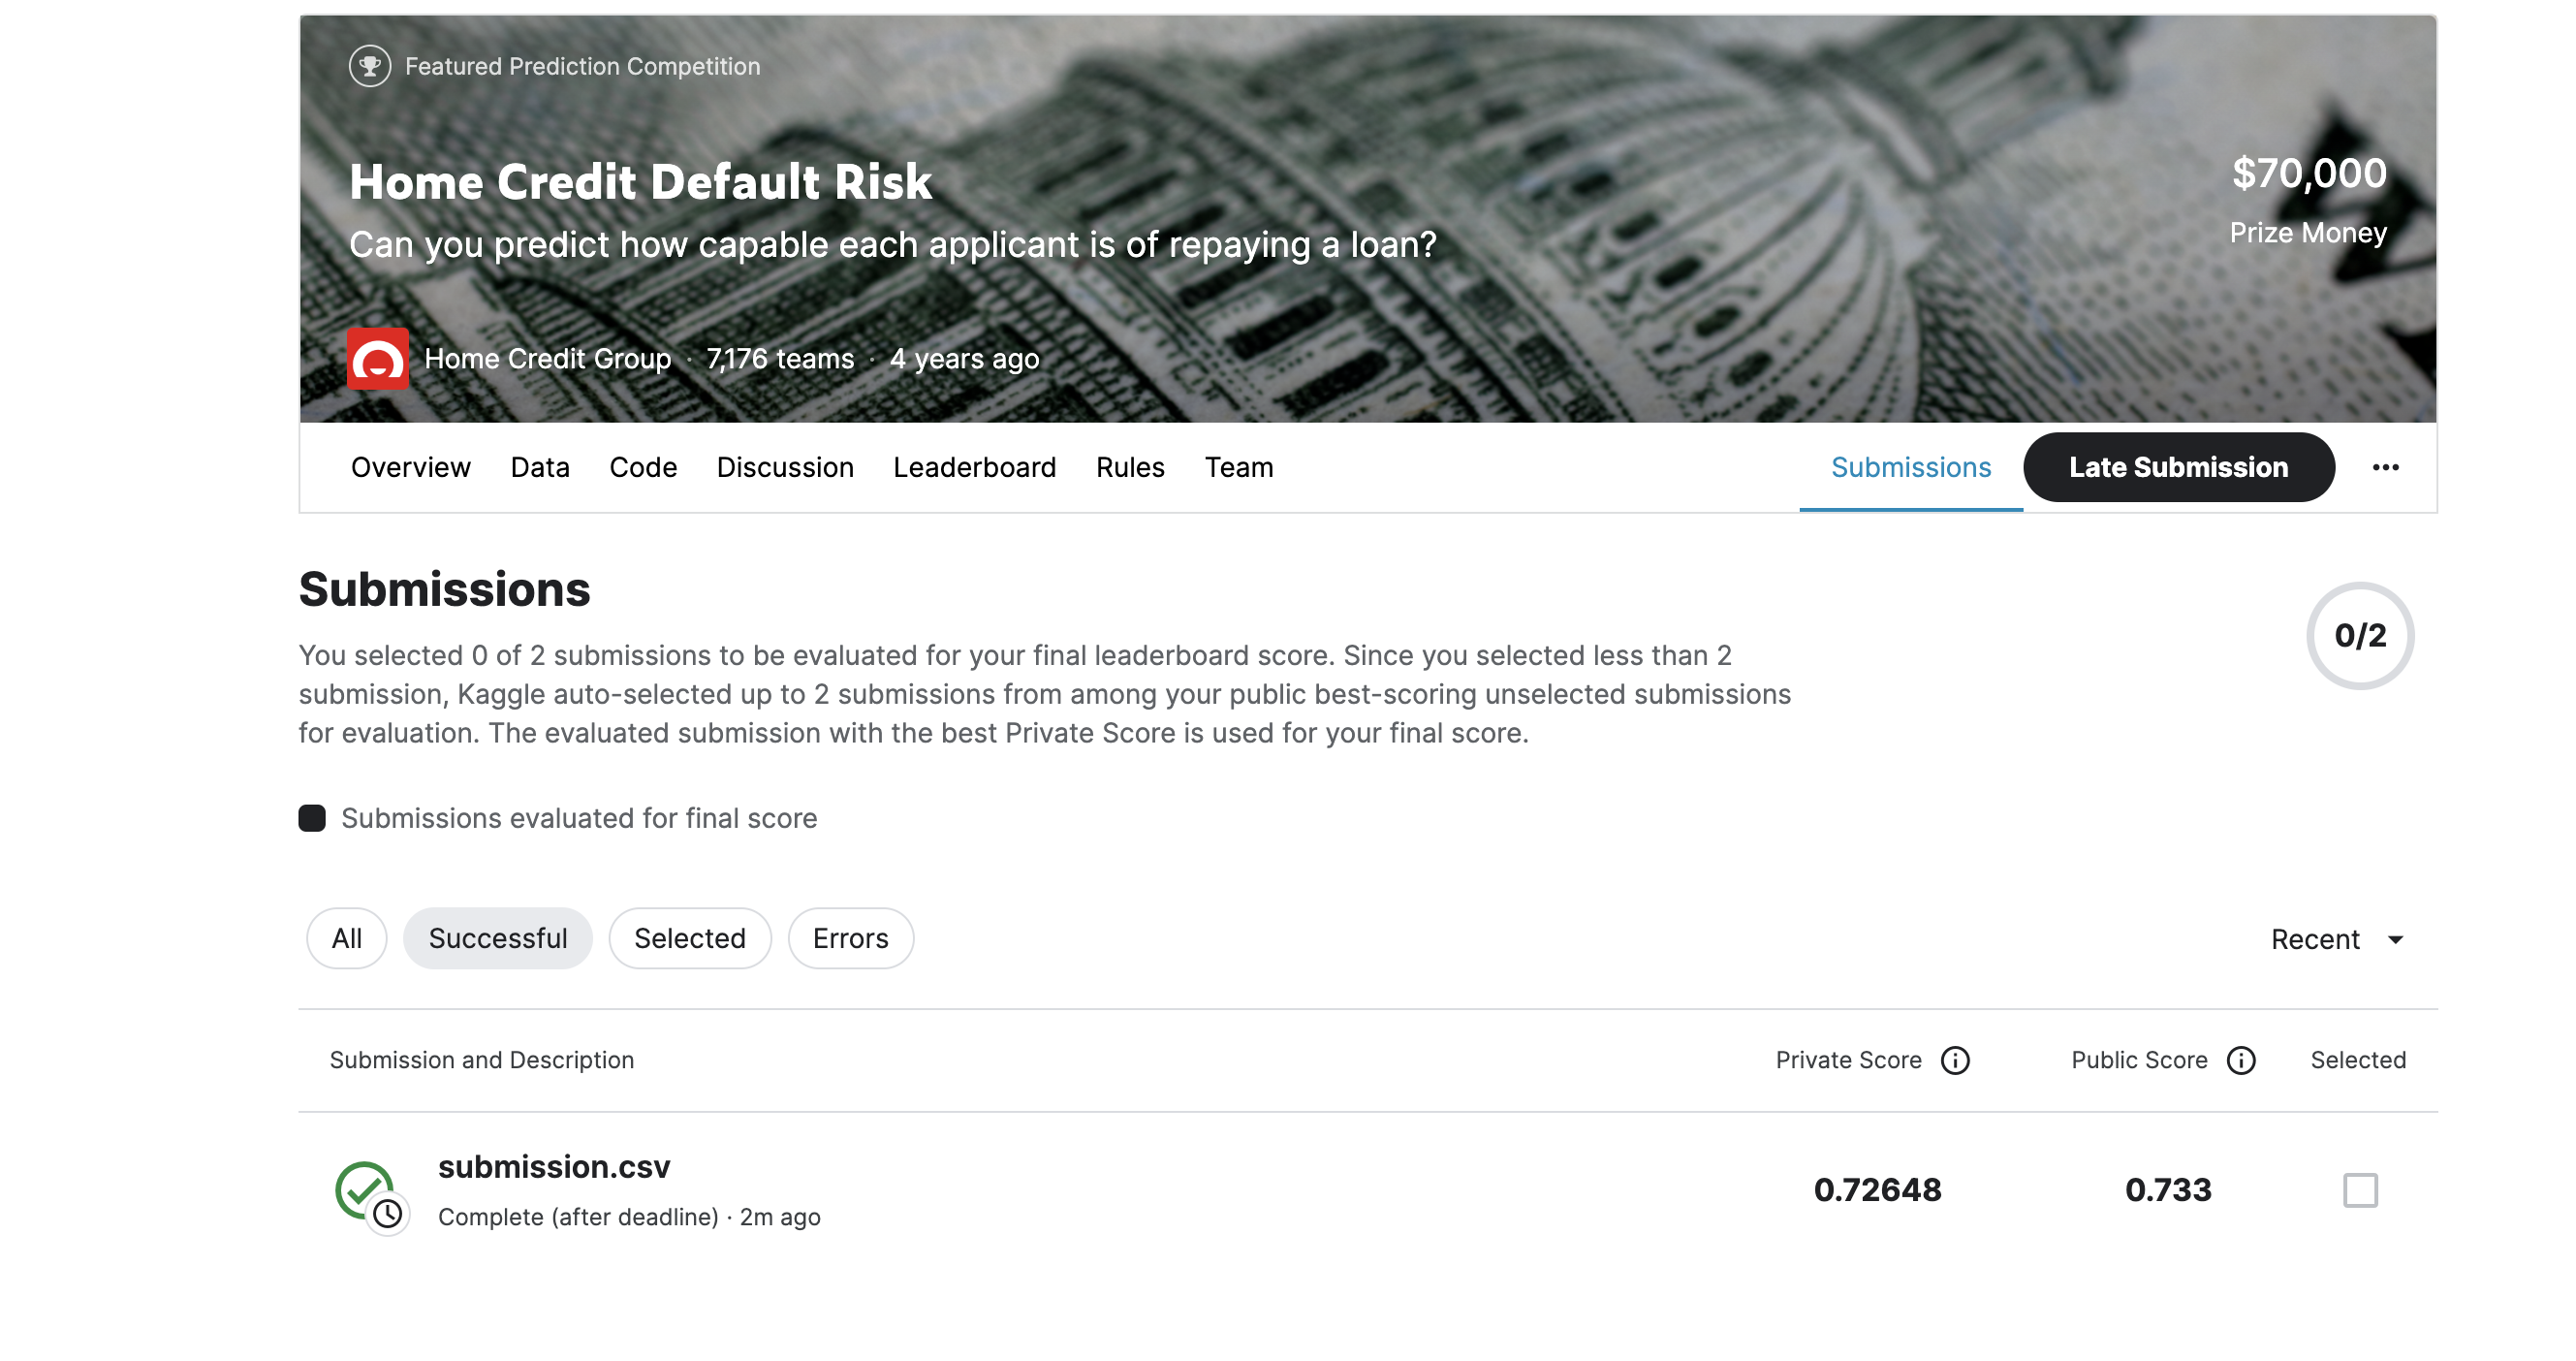

# Write-up 
For this phase of the project, you will need to submit a write-up summarizing the work you did. 
The write-up form is available on Canvas (Modules-> Module 12.1 - Course Project - Home Credit Default Risk (HCDR)-> FP Phase 2 (HCDR) : write-up form ). It has the following sections: 
## Abstract

Our goal was to determine how accurately we can predict a new applicant's ability to pay loans. Our area of focus during his week was high level EDA, feature engineering and building a baseline model for our overall goal. From the EDA, we found skewed distributions, correlations which we will utilizemore during phase 2. After EDA and feature engineering, we created 4 data pipeline for char as well as numerical values,with different features and fed it into logistic regression. From this pipeline, we obtained an ROC score of 73.3 in Kaggle and 91.95% in test accuracy.  


## Introduction
## Feature Engineering and transformers
Please explain the work you conducted on feature engineering and transformers. 
Please include code sections when necessary as well as images or any relevant material.

**Section 3.4**

For feature engineering, first we found 2 skewed attributes from the numerical features and did log transformation on the same. And, we also performed correlation between target variable and predictor variables. In additin, based on null value percentage for variables, we did feature engineering as well. 
Here are the screenshots for correlation and log transoformation.

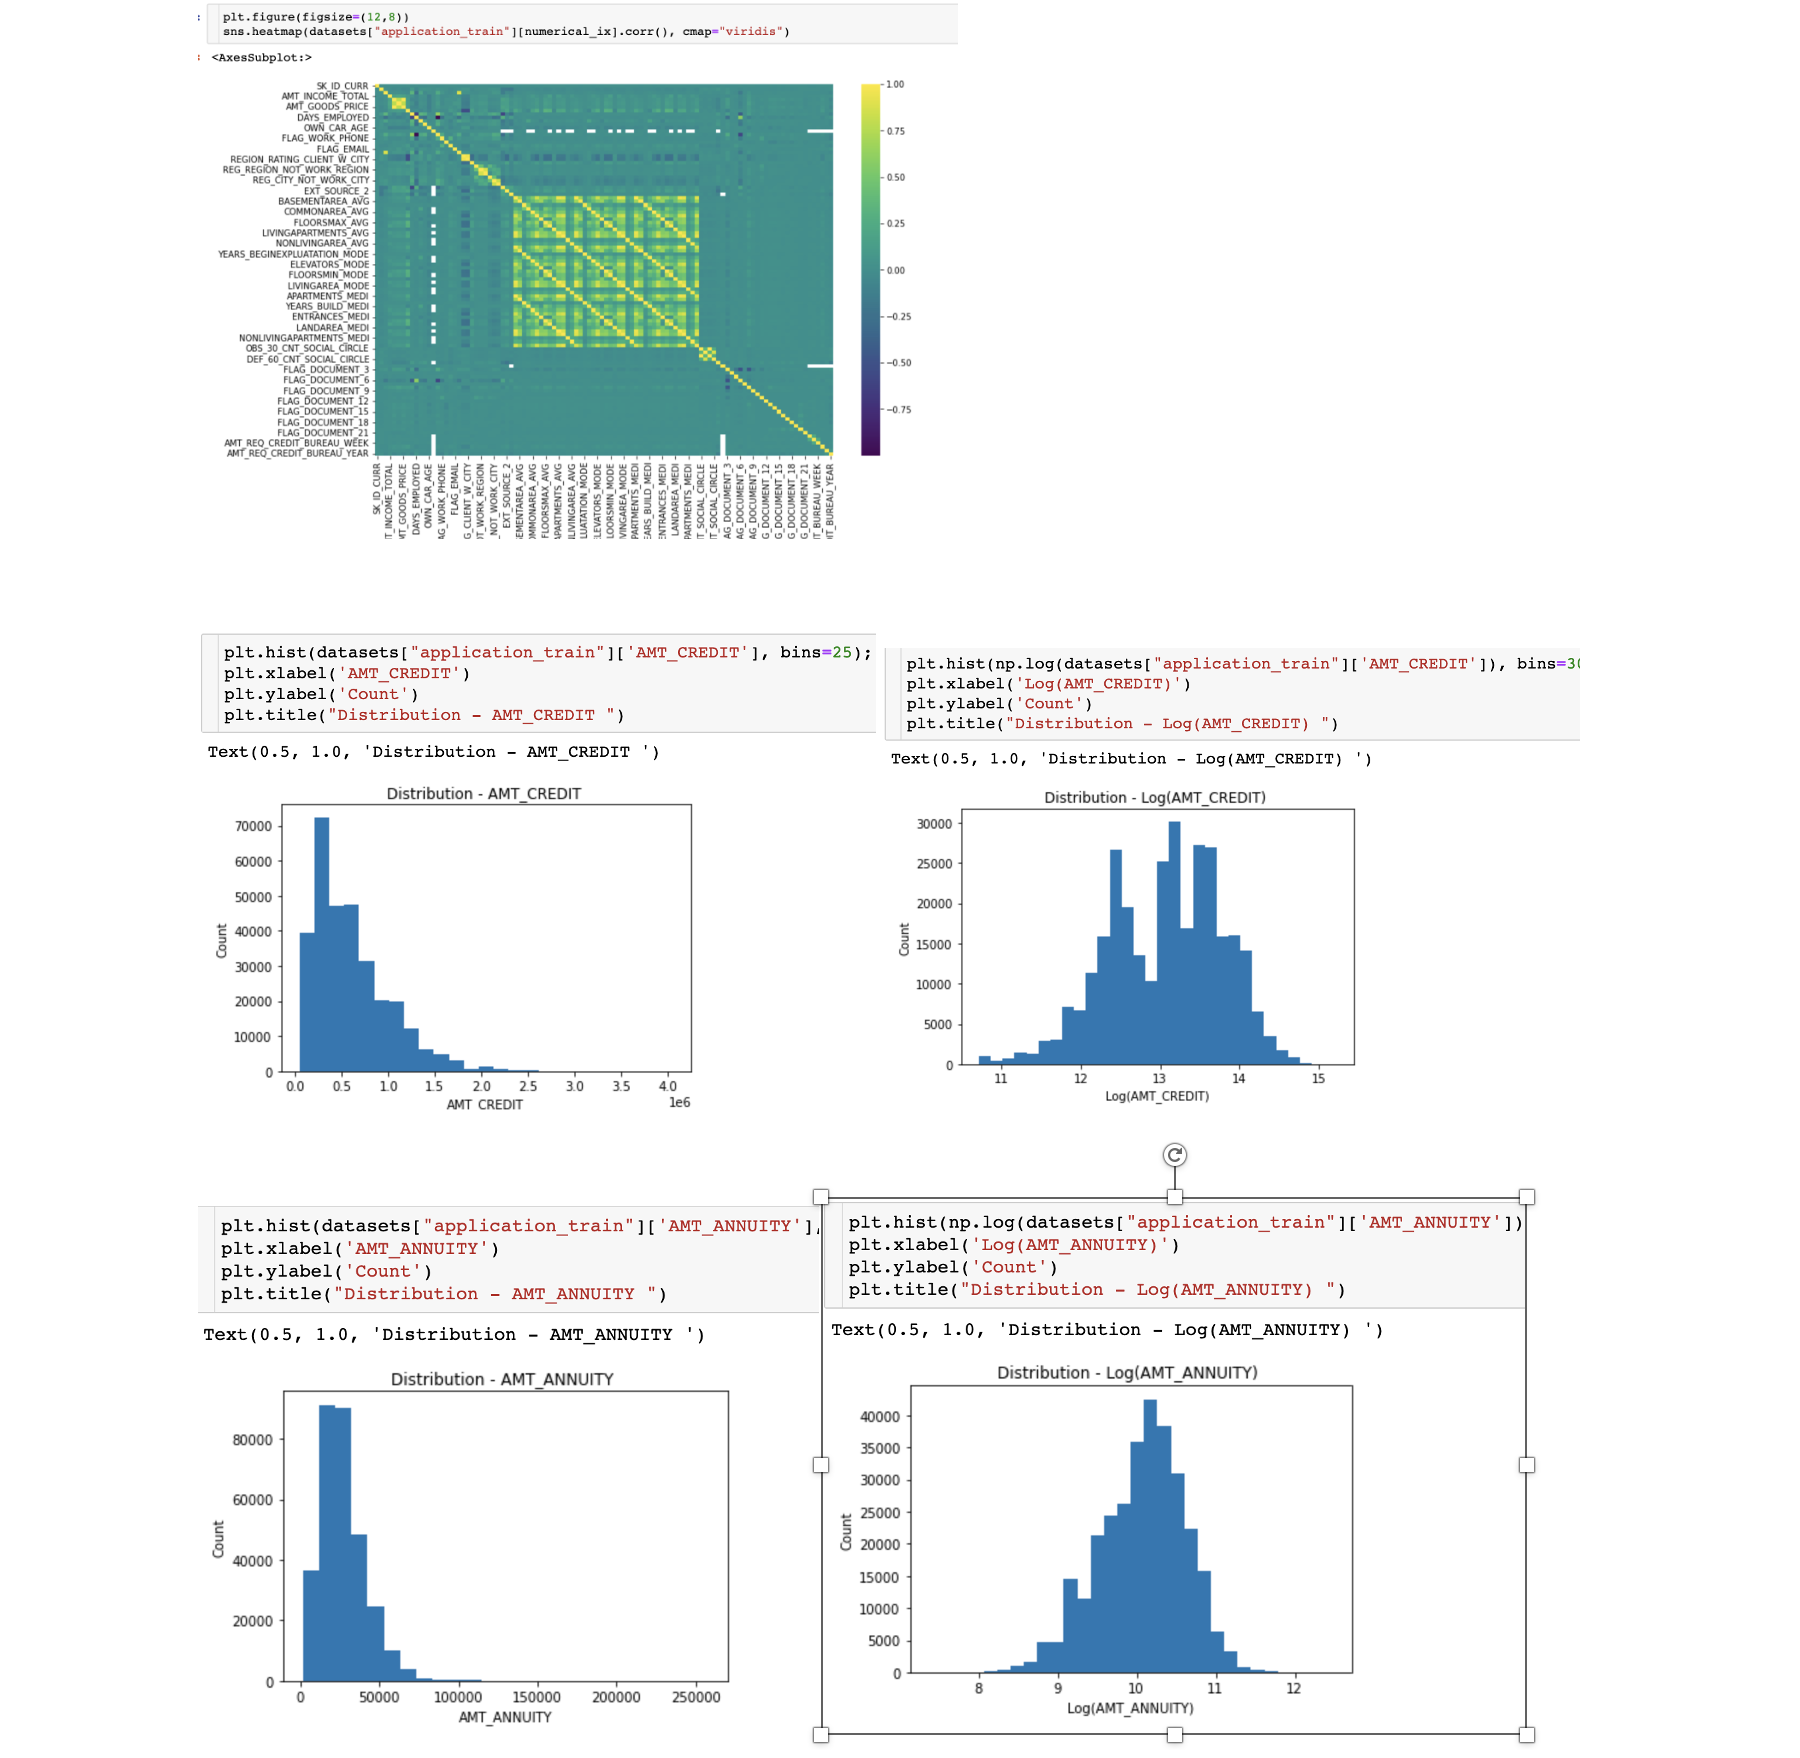
## Pipelines
Please explain the pipelines you created for this project and how you used them
Please include code sections when necessary as well as images or any relevant material

All pipelines are prepared under section 7. 

Our **All Feature** model has all the 120 features (except 'SK_ID_CURR', 'TARGET' )as available in the training set. Then there are 2 set of models where we are selecting the features that we want to use. 1st one, **Baseline with 14 attributes** has 14 attributes, and another one, **Baseline with 79 attributes** has 79 attributes. for model with 14 elements, we used 7 numerical and 7 categorical attributes. For model with 79 attributes, we removed the elements which have more than 50% null values in the the training data. Last model which we used, **Baseline with log features** it has 2 attributes which were log transformed. Apart from that, we used the 79 elements model with it.

Numerical features were standardized using Standard scaler, and we used median to fill in the missing values. As far as categorical data is concerned, We did one hot encoding to standatdize and missing values were filled using the ost frequent values. 

**AUC_ROC score** is used to evaluate our models.

__We have created 3 Logistic regression models:__

    Baseline1_all features 120 raw inputs
    Baseline2_all features 14 inputs
    Baseline3_selected features 79 raw inputs
    Baseline4_selected features 79 raw inputs with a log feature (log AMT_ANNUITY, log AMT_CREDIT)
   
 
 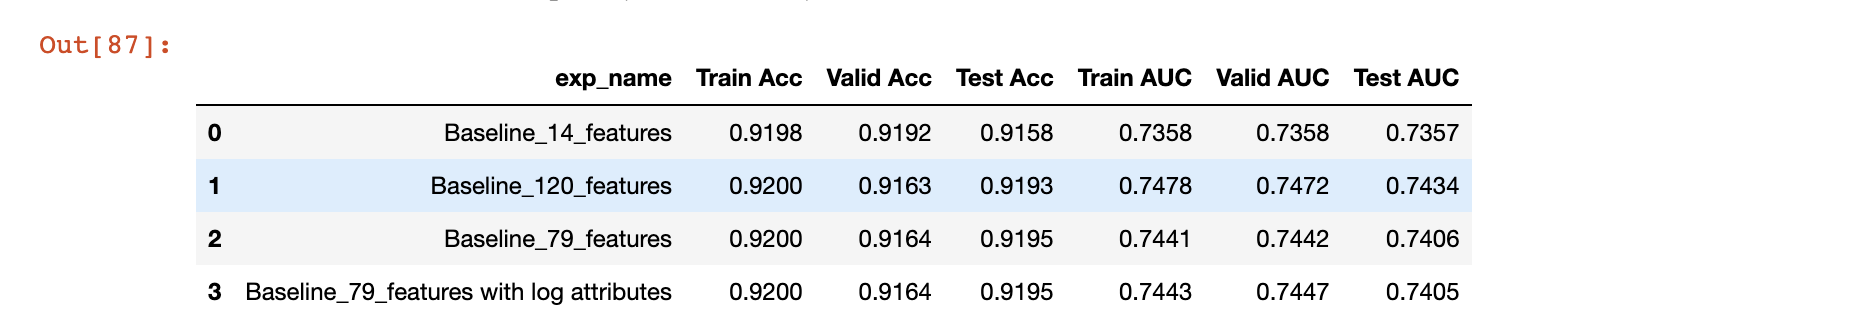
 
 
 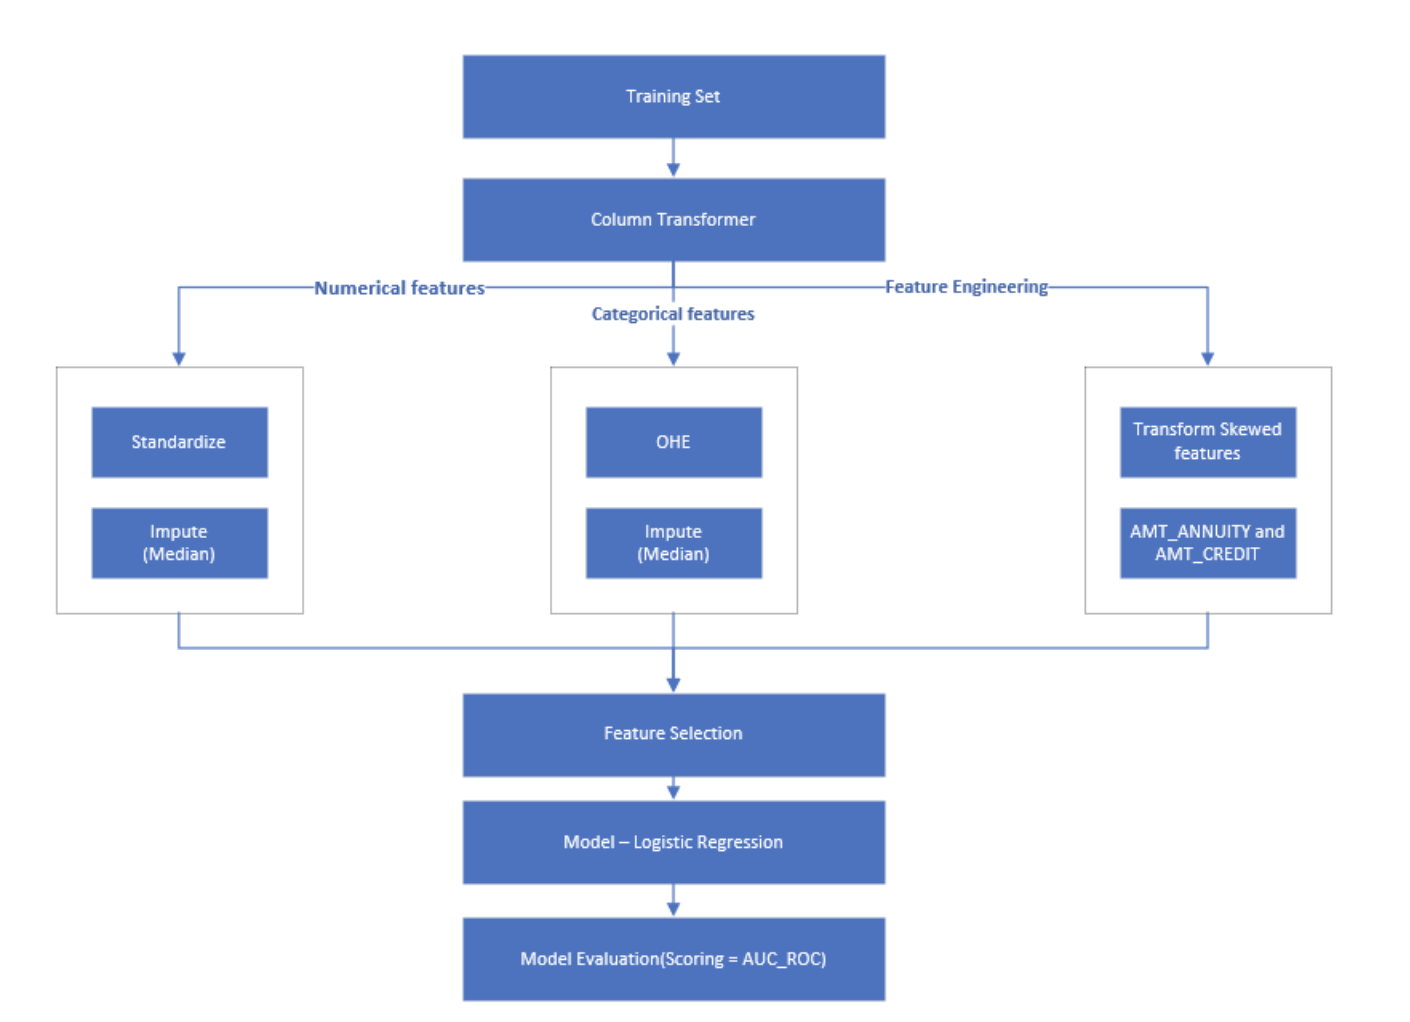
    
## Experimental results
Please present the results of the various experiments that you conducted. The results should be shown in a table or image. Try to include the different details for each experiment.  

Please include code sections when necessary as well as images or any relevant material




 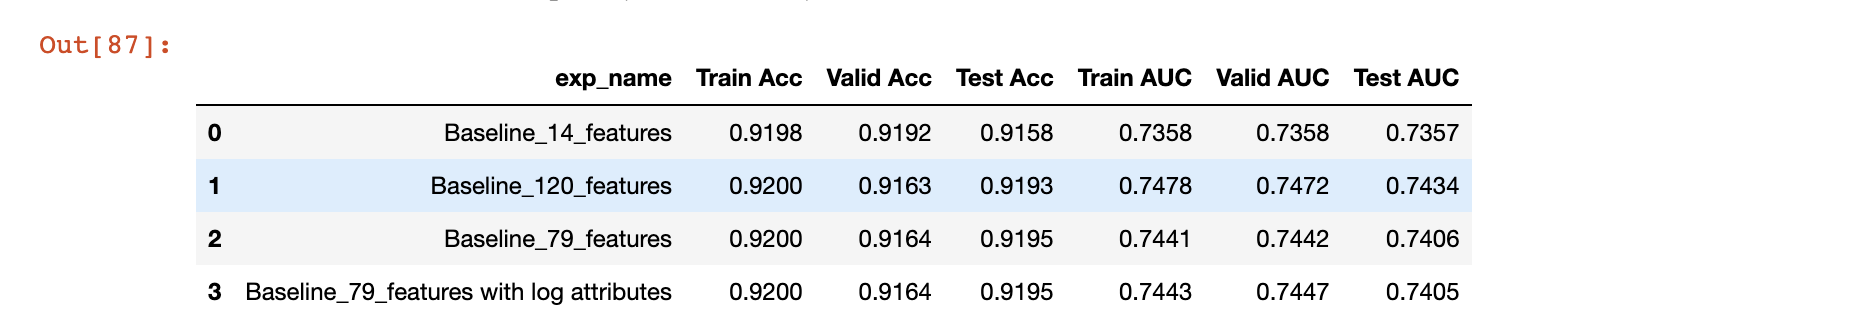

## Discussion

We did 4 experimemts as stated in the picture attached. Except for model with 14 features, 
all other models have training accuracy of 92%. Best validation accuracy was schieved 
for model 3 and 4 and section 7.4 and 7.5. For the scoring, we used AUC score which was 74.34% 
for the model with all attributes.

With more robust feature selection, OHE's, loss functions, and grid paramaters, we think that the score could be improved substantially. We will use our current understanding and inculcalte the learnings and will try to improve our results. 

## Conclusion

In this phase we have understood the dataset by performing EDA where we have checked for the relationship between Target variable and numerical features,categorical features and also checked for the missing values for features.

Upon that, we build 4 pipelines using logistic regression and we have compared all the training and testing accuracies to see which pipeline works best. Our aim in this phase is to achieve best accuracy.

The baseline model with all features has the highest test AUC score in notebook(0.7434) and in Kaggle submission (0.733). We hope for a better score by doing more feature engineering in the next phase.

For the next phase, we will be performing feature engineering on all the data sets to find the important features, perform dimensionality reduction, SVC, and perform feature engineering.

## Kaggle Submission
Please provide a screenshot of your best kaggle submission.   
The screenshot should show the different details of the submission and not just the score.

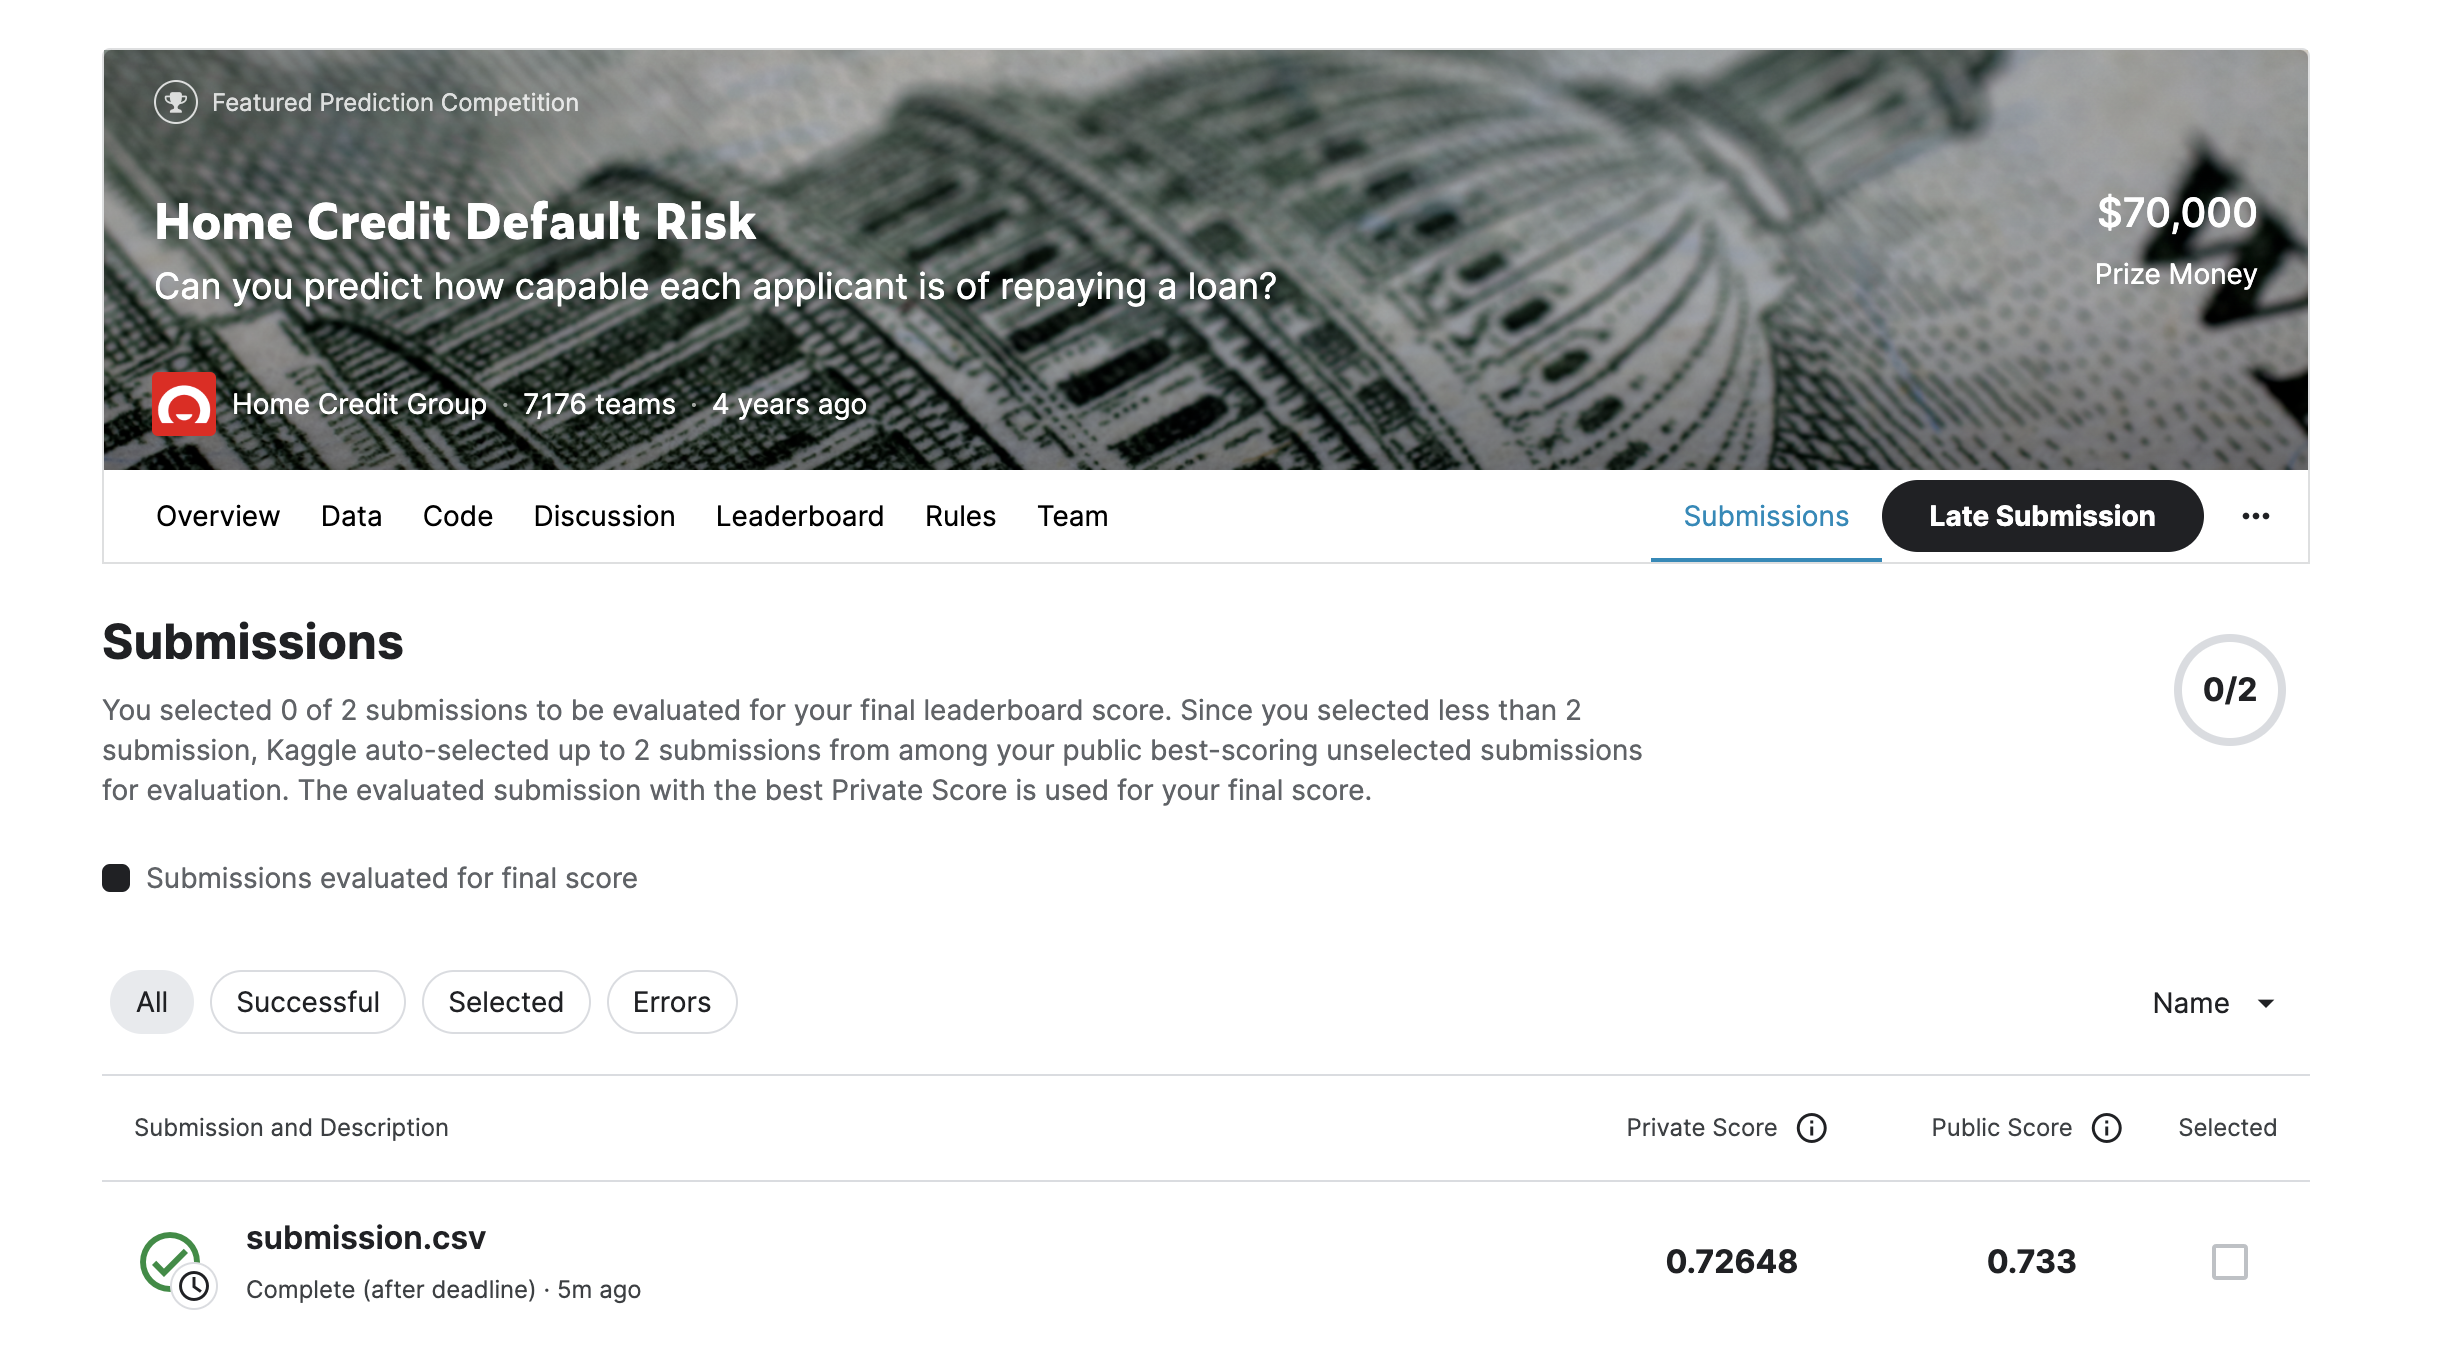

# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)


#  TODO: Predicting Loan Repayment with Automated Feature Engineering in Featuretools

Read the following:
* feature engineering via Featuretools library: 
  * https://github.com/Featuretools/predict-loan-repayment/blob/master/Automated%20Loan%20Repayment.ipynb
* https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/
* feature engineering paper: https://dai.lids.mit.edu/wp-content/uploads/2017/10/DSAA_DSM_2015.pdf
* https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/